## Part I: Data Pre-processing

In [2]:
import pandas as pd

In [3]:
# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt

--2025-10-02 05:18:55--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.198.91, 142.250.66.91, 142.250.204.59, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.198.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.2’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.03s   

2025-10-02 05:18:55 (21.5 MB/s) - ‘questions-words.txt.2’ saved [603955/603955]



In [4]:
# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()

In [5]:
# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [6]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.
count_subcat = 0
count_entries = 0
questions = []
categories = []
sub_categories = []
current_subcat = ""
current_cat = ""
for entry in data:
    count_entries += 1
    if ": " in entry:
        count_subcat += 1
        if(count_subcat >1):
          print(f"Entries for category {current_cat} and subcategory {current_subcat}: \n{count_entries}")
        count_entries = 0
        current_subcat = entry
        if count_subcat <= 5:
            current_cat = "Semantic"
        elif count_subcat > 5:
            current_cat = "Syntactic"
    else:
        categories.append(current_cat)
        sub_categories.append(current_subcat)
        questions.append(entry)

print(f"Entries for category {current_cat} and subcategory {current_subcat}: \n{count_entries}")
print(f"\nCount of subcategories: {count_subcat}")


Entries for category Semantic and subcategory : capital-common-countries: 
507
Entries for category Semantic and subcategory : capital-world: 
4525
Entries for category Semantic and subcategory : currency: 
867
Entries for category Semantic and subcategory : city-in-state: 
2468
Entries for category Semantic and subcategory : family: 
507
Entries for category Syntactic and subcategory : gram1-adjective-to-adverb: 
993
Entries for category Syntactic and subcategory : gram2-opposite: 
813
Entries for category Syntactic and subcategory : gram3-comparative: 
1333
Entries for category Syntactic and subcategory : gram4-superlative: 
1123
Entries for category Syntactic and subcategory : gram5-present-participle: 
1057
Entries for category Syntactic and subcategory : gram6-nationality-adjective: 
1600
Entries for category Syntactic and subcategory : gram7-past-tense: 
1561
Entries for category Syntactic and subcategory : gram8-plural: 
1333
Entries for category Syntactic and subcategory : gram

In [7]:
# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)

In [8]:
df.head()

,Question,Category,SubCategory
0,Athens Greece Baghdad Iraq,Semantic,: capital-common-countries
1,Athens Greece Bangkok Thailand,Semantic,: capital-common-countries
2,Athens Greece Beijing China,Semantic,: capital-common-countries
3,Athens Greece Berlin Germany,Semantic,: capital-common-countries
4,Athens Greece Bern Switzerland,Semantic,: capital-common-countries


In [9]:
df.to_csv(f"{file_name}.csv", index=False)

## Part II: Use pre-trained word embeddings
- After finish Part I, you can run Part II code blocks only.

In [36]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [11]:
data = pd.read_csv("questions-words.csv")

In [12]:
MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

The Gensim model loaded successfully!


Exploring the data manipulation functions

In [13]:
data["Question"][0].split(" ")[0]

'Athens'

In [14]:
str(data["Question"][0])

'Athens Greece Baghdad Iraq'

In [15]:
model[data["Question"][0].split(" ")[0].lower()]

array([ 1.7342e-01,  1.8416e-01,  1.0752e-01,  8.0895e-02, -6.0546e-02,
        6.4409e-01, -6.6417e-01,  7.5784e-03,  3.2781e-01,  8.6334e-01,
       -1.7249e-02,  1.3235e-01, -1.1111e-01,  8.2899e-02, -1.8723e+00,
       -2.4523e-01, -3.6590e-01,  2.5461e-01, -1.0039e+00, -5.7647e-01,
       -2.2902e-01, -1.5441e-03, -1.5344e-01,  9.8980e-01, -3.5196e-01,
       -1.0440e+00, -7.9414e-01, -2.1094e-01,  1.5623e-01, -7.0185e-03,
       -1.1684e+00, -2.5954e-01, -2.1237e-01,  6.5456e-01,  2.3970e-01,
       -3.1490e-01,  3.3004e-01,  6.7173e-01, -8.0113e-01, -4.6615e-01,
       -3.4569e-01, -7.0873e-01,  7.7523e-02, -6.8877e-01,  5.2528e-01,
        3.3270e-01,  7.5618e-01, -9.7403e-01,  4.4714e-01,  2.8312e-01,
        2.6373e-01, -1.3202e-02,  6.6350e-01,  3.6040e-01, -8.5813e-01,
       -2.0277e+00, -1.3650e-01,  3.1626e-01,  5.3241e-01,  1.4066e-01,
       -1.0242e+00,  1.9140e-01, -4.0100e-01,  6.5574e-01, -4.3107e-01,
        4.5042e-01, -6.6581e-01,  1.3066e-01, -3.9877e-01, -1.11

In [16]:
word_a = model[data["Question"][0].split(" ")[0].lower()]
word_b = model[data["Question"][0].split(" ")[1].lower()]
word_c = model[data["Question"][0].split(" ")[2].lower()]
word_d = model[data["Question"][0].split(" ")[3].lower()]

pred = word_b + word_c - word_a

model.most_similar(positive = pred, topn = 1)[0][0]

'iraq'

In [8]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a = analogy.split(" ")[0].lower()
      word_b = analogy.split(" ")[1].lower()
      word_c = analogy.split(" ")[2].lower()
      word_d = analogy.split(" ")[3].lower()
      pred = model[word_b] + model[word_c] - model[word_a]
      preds.append(model.most_similar(positive = pred, topn = 1)[0][0])
      golds.append(word_d)



100%|██████████| 19544/19544 [05:40<00:00, 57.31it/s]


In [9]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 44.31164731085804%
Category: Syntactic, Accuracy: 27.306791569086652%
Sub-Category: capital-common-countries, Accuracy: 79.05138339920948%
Sub-Category: capital-world, Accuracy: 65.42882404951371%
Sub-Category: currency, Accuracy: 9.006928406466514%
Sub-Category: city-in-state, Accuracy: 11.795703283340089%
Sub-Category: family, Accuracy: 39.723320158102766%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 6.048387096774194%
Sub-Category: gram2-opposite, Accuracy: 6.280788177339902%
Sub-Category: gram3-comparative, Accuracy: 30.705705705705704%
Sub-Category: gram4-superlative, Accuracy: 25.49019607843137%
Sub-Category: gram5-present-participle, Accuracy: 13.446969696969695%
Sub-Category: gram6-nationality-adjective, Accuracy: 86.55409631019387%
Sub-Category: gram7-past-tense, Accuracy: 11.346153846153847%
Sub-Category: gram8-plural, Accuracy: 15.54054054054054%
Sub-Category: gram9-plural-verbs, Accuracy: 22.873563218390807%


Exploring the data before plotting

In [20]:
data[data['SubCategory'] == ": family"].iloc[:]["Question"]

,Question
8363,boy girl brother sister
8364,boy girl brothers sisters
8365,boy girl dad mom
8366,boy girl father mother
8367,boy girl grandfather grandmother
...,...
8864,uncle aunt son daughter
8865,uncle aunt sons daughters
8866,uncle aunt stepbrother stepsister
8867,uncle aunt stepfather stepmother


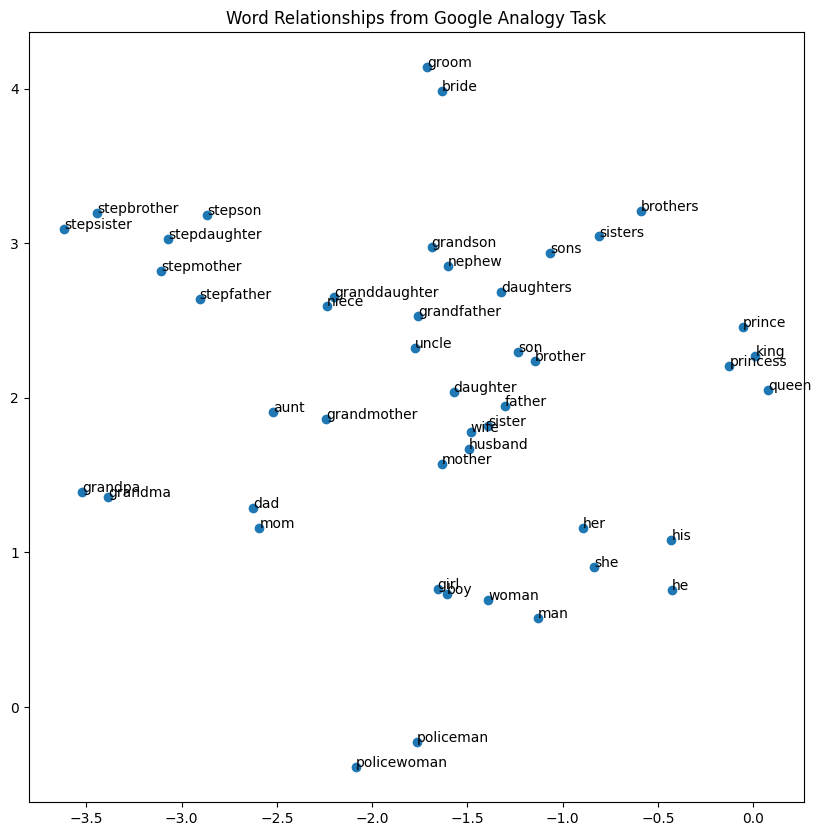

<Figure size 640x480 with 0 Axes>

In [27]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`
from sklearn.manifold import TSNE

# Definint the t-SNE 2D representation
tsne = TSNE(n_components=2, metric='cosine', random_state=42)

family_vect_data = []
# words_to_plot = []
words_to_plot = set()

# Obtaining all the unique words from the analogies in the 'family' subcategory
for analogy in data[data['SubCategory'] == ": family"].iloc[:]["Question"]:
    for word in analogy.split(" "):
        words_to_plot.add(word.lower())
        # This part uncommented obtains all words, even non-unique
        # words_to_plot.append(word.lower())
        # family_vect_data.append(model[word.lower()])

# Obtaining the embedding vectors of the unique words in the subcategory
for word in words_to_plot:
    family_vect_data.append(model[word.lower()])

# Obtaining the tsne 2D representation of the embeddings
converted_vec = tsne.fit_transform(np.array(family_vect_data))


# Plotting the figure
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(converted_vec[:, 0], converted_vec[:, 1])

# Labeling each point with the related word
for label, x, y in zip(words_to_plot, converted_vec[:, 0], converted_vec[:, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")

### Part III: Train your own word embeddings

### Get the latest English Wikipedia articles and do sampling.
- Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2). However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus ([`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus)) will take much time. Therefore, we provide cleaned files for you.

In [34]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
!gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O wiki_texts_part_0.txt.gz
!gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O wiki_texts_part_1.txt.gz
!gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O wiki_texts_part_2.txt.gz
!gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O wiki_texts_part_3.txt.gz
!gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O wiki_texts_part_4.txt.gz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd

but Gdown can't. Please check connections and permissions.
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warn

In [35]:
# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
!gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O wiki_texts_part_5.txt.gz
!gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O wiki_texts_part_6.txt.gz
!gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O wiki_texts_part_7.txt.gz
!gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O wiki_texts_part_8.txt.gz
!gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O wiki_texts_part_9.txt.gz
!gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O wiki_texts_part_10.txt.gz

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI

but Gdown can't. Please check connections and permissions.
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warn

Couldn't download with the above links, so I tried the others.

In [18]:
!gdown --id 1J0os1846PQ129t720aI0wMm-5GepEwSl -O wiki_texts_part_0.txt.gz
!gdown --id 1tsI3RSKPN3b2-1IZ0N7bmjgVRf-THIkW -O wiki_texts_part_1.txt.gz
!gdown --id 1koiw6RFNzDe6pe2zMTfVhsEKmpmnYyu5 -O wiki_texts_part_2.txt.gz
!gdown --id 1YSGbDqhbg2xJsWD_hYQ5z9URl0dCTC2m -O wiki_texts_part_3.txt.gz
!gdown --id 1PA3C99C8CcLFjkenT0a9iU07XEQmXyG_ -O wiki_texts_part_4.txt.gz

/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1J0os1846PQ129t720aI0wMm-5GepEwSl
From (redirected): https://drive.google.com/uc?id=1J0os1846PQ129t720aI0wMm-5GepEwSl&confirm=t&uuid=8122646f-1755-494b-aea9-011cd8e6c7e6
To: /home/didiersalest/NLP_HW1/wiki_texts_part_0.txt.gz
100%|██████████████████████████████████████| 1.51G/1.51G [01:05<00:00, 23.2MB/s]
/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tsI3RSKPN3b2-1IZ0N7bmjgVRf-THIkW
From (redirected): https://drive.google.com/uc?

In [19]:
!gdown --id 1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX -O wiki_texts_part_5.txt.gz
!gdown --id 1i6kXTDtZkRiivJ0mj-5GkVbE4gMFlmSb -O wiki_texts_part_6.txt.gz
!gdown --id 1ain2DN1nxXfsmJ2Aj9TFZlLVJSPsu9Jb -O wiki_texts_part_7.txt.gz
!gdown --id 1UKhvielQDqQz5pMZ7J3SHv9m8_8gO-dE -O wiki_texts_part_8.txt.gz
!gdown --id 1q1zMA4hbMS7tID2GTQx-c94UPB8YQaaa -O wiki_texts_part_9.txt.gz
!gdown --id 1-kkGxwMxPsoGg5_2pdaOeE3Way6njLpH -O wiki_texts_part_10.txt.gz

/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX
From (redirected): https://drive.google.com/uc?id=1sSLea4hq6Z7oT6noOU_II1ahWjNOKcDX&confirm=t&uuid=5ced4e5e-866d-41f8-9e12-3bb62ed4567e
To: /home/didiersalest/NLP_HW1/wiki_texts_part_5.txt.gz
100%|████████████████████████████████████████| 578M/578M [00:19<00:00, 30.0MB/s]
/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1i6kXTDtZkRiivJ0mj-5GkVbE4gMFlmSb
From (redirected): https://drive.google.com/uc?

In [20]:
# Extract the downloaded wiki_texts_parts files.
!gunzip -k wiki_texts_part_*.gz

In [21]:
# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt

In [22]:
# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt

anarchism is political philosophy and movement that is against all forms of authority and seeks to abolish the institutions it claims maintain unnecessary coercion and hierarchy typically including the state and capitalism anarchism advocates for the replacement of the state with stateless societies and voluntary free associations as historically left wing movement this reading of anarchism is placed on the farthest left of the political spectrum usually described as the libertarian wing of the socialist movement libertarian socialism although traces of anarchist ideas are found all throughout history modern anarchism emerged from the enlightenment during the latter half of the th and the first decades of the th century the anarchist movement flourished in most parts of the world and had significant role in workers struggles for emancipation various anarchist schools of thought formed during this period anarchists have taken part in several revolutions most notably in the paris commune

Please note that we used the default parameters of [`gensim.corpora.wikicorpus.WikiCorpus`](https://radimrehurek.com/gensim/corpora/wikicorpus.html#gensim.corpora.wikicorpus.WikiCorpus) for cleaning the Wiki raw file. Thus, words with one character were discarded.

In [23]:
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random
from tqdm import tqdm

wiki_txt_path = "wiki_texts_combined.txt"
# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.

# Defining variables
output_path = "wiki_texts_combined_sample_20_prcnt.txt"
article_list = []
sample_percentage = 0.2
with open(wiki_txt_path, "r", encoding="utf-8") as f:
    # We obtain the length of the articles
    total=sum(1 for line in f)
    print(f"Total articles: {total}")
    f.seek(0) # after counting moving pointer to the beginning
    with open(output_path, "w", encoding="utf-8") as output_file:
      # TODO4: Sample `20%` Wikipedia articles
      # Write your code here

      # We obtain the length of the sample
      sample_len = sample_percentage * total
      print(f"\nSample length of articles ({sample_percentage*100})%: {sample_len}")
      sampled_indices_articles = random.sample(range(total), int(sample_len))

      # I was having problems processing the lines of the articles fast
      # So I asked Gemini what is the bottleneck in my code, and it was that before I was using a list
      # to validate the sampled_indices_articles, but Gemini suggested to use a set instead for faster lookup

      # for lookup we use a set
      sampled_indices_set = set(sampled_indices_articles)
      print(f"Length sampled indices {len(sampled_indices_articles)}")
      for index, line in tqdm(zip(range(total), f), desc="Writing sampled articles to file...", total=total):
        if index in sampled_indices_set:
          output_file.write(line)


Total articles: 5623655

Sample length of articles (20.0)%: 1124731.0
Length sampled indices 1124731


Writing sampled articles to file...: 100%|██████████| 5623655/5623655 [00:20<00:00, 278296.32it/s]


In [3]:
# TODO5: Train your own word embeddings with the sampled articles
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# Hint: You should perform some pre-processing before training.
# Preprocessing
sample_article_lst = []
sample_path = "wiki_texts_combined_sample_20_prcnt.txt"
with open(sample_path, "r", encoding="utf-8") as f:
    for line in tqdm(f, desc="Appending sampled articles..."):
      sample_article_lst.append(line)

Appending sampled articles...: 1124731it [00:42, 26665.94it/s]


In [4]:
len(sample_article_lst)

1124731

In [5]:
# Converting the list into pandas dataframe
import pandas as pd
sample_articles_df = pd.DataFrame(
    {
        "Articles": sample_article_lst,
    }
)

In [20]:
from fast_langdetect import detect

print(detect("Hello, world!", model="auto", k=1))

[2025-10-02 03:53:19,087][INFO] - Downloading https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin to lid.176.bin (125.2M)


  0%|          | 0.00/125M [00:00<?, ?B/s]

[{'lang': 'en', 'score': 0.336122989654541}]


In [ ]:
detect("Hello, world!", model="auto", k=1)[0]['lang']

'en'

In [ ]:
from fast_langdetect import detect

def detect_english(text: str)->str:
    return detect(text, model="auto", k=1)[0]['lang']

print(detect_english("Hello my friend!"))

en


In [7]:
tqdm.pandas()
# Gemini helped me in articulating the lambda function
sample_articles_df['lang'] = sample_articles_df['Articles'].apply(lambda x: detect_english(x))

# Filter for English articles
english_articles_df = sample_articles_df[sample_articles_df['lang'] == 'en'].copy()
print(f"Found {len(english_articles_df)} English articles.")

Found 1115791 English articles.


In [8]:
english_articles_df["Tokenized_Articles"] = None
english_articles_df

,Articles,lang,Tokenized_Articles
0,actresses catalan actrius is catalan language ...,en,None
1,agricultural science or agriscience for short ...,en,None
2,alien primarily refers to alien law person in ...,en,None
3,apollo god of light eloquence poetry and the f...,en,None
4,the american football conference afc is one of...,en,None
...,...,...,...
1124726,josé ignacio rodríguez november february was c...,en,None
1124727,the offaly senior hurling championship was the...,en,None
1124728,firefighters in front of bellmore cinema court...,en,None
1124729,the offaly senior hurling championship was the...,en,None


In [10]:
english_articles_df.to_pickle("sampled_20_prcnt_english_articles.pkl")

In [1]:
import pandas as pd
english_articles_df = pd.read_pickle('sampled_20_prcnt_english_articles.pkl')

In [ ]:
from tqdm import tqdm
import spacy

spacy.require_gpu() # To use GPU
nlp = spacy.load("en_core_web_sm", disable=['tagger', 'parser', 'ner', 'senter', 'attribute_ruler'], exclude=['tagger', 'parser', 'ner', 'senter', 'attribute_ruler'])
nlp.add_pipe("doc_cleaner", last=True) 

def validate_pipe(doc):
    lemma_list = [token.lemma_.lower() for token in doc if not token.is_stop]
    return lemma_list

def preprocess_pipe(texts, batch_size=110):
    processed_docs = []
    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size), desc="Tokenizing articles...", total = int(len(texts)/batch_size)):
        processed_docs.append(validate_pipe(doc))

    return processed_docs

In [8]:
english_articles_df["Tokenized_Articles"] = preprocess_pipe(english_articles_df["Articles"])
# preprocess_pipe(english_articles_df["Articles"])

Tokenizing articles...:   0%|          | 0/10143 [00:00<?, ?it/s]/home/didiersalest/NLP_HW1/.venv/lib/python3.12/site-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
Tokenizing articles...: 1115791it [59:41, 311.50it/s]                         


In [9]:
english_articles_df.to_pickle("sampled_20_prcnt_tknzd_eng_articles.pkl")

In [11]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(filename='gensim.log', format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO, force=True)

class MonitorCallback(CallbackAny2Vec):
    def __init__(self, test_words):
        self._test_words = test_words

    def on_epoch_end(self, model):
        print("Model loss:", model.get_latest_training_loss())  # print loss
        # for word in self._test_words:  # show wv logic changes
        #     print(model.wv.most_similar(word))
def get_unique_words(tokenized_articles):
    unique_words = set()
    for article in tqdm(tokenized_articles, desc="Counting unique words..."):
        for word in article:
            unique_words.add(word)
    return unique_words

unique_words = list(get_unique_words(english_articles_df["Tokenized_Articles"]))
print(f"Amount of unique words: {len(unique_words)}")
monitor = MonitorCallback(["happy", "angry", "news"])
# setting
vector_dim = 100
window_size = 5
min_count = 20
training_epochs = 1
cpu_cores = 32

# model
word2vec_model = Word2Vec(sentences=english_articles_df["Tokenized_Articles"], 
                          vector_size=vector_dim, window=window_size, workers=cpu_cores,
                          min_count=min_count, epochs=training_epochs, callbacks=[monitor], compute_loss=True)

Counting unique words...:   0%|          | 0/1115791 [00:00<?, ?it/s]

Counting unique words...: 100%|██████████| 1115791/1115791 [00:26<00:00, 42344.41it/s]


Amount of unique words: 4281480
Model loss: 16527603.0


In [38]:
word2vec_model.save("wiki_sample_20_prcnt_model")

In [45]:
# If we want to load
word2vec_model = Word2Vec.load("wiki_sample_20_prcnt_model")

In [46]:
data = pd.read_csv("questions-words.csv")

In [49]:
import pandas as pd
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

data_predictions = data.copy()
data_predictions["Gold"] = None
data_predictions["Prediction"] = None

for index, analogy in tqdm(enumerate(data["Question"]), total = len(data["Question"])):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a = analogy.split(" ")[0].lower()
      word_b = analogy.split(" ")[1].lower()
      word_c = analogy.split(" ")[2].lower()
      word_d = analogy.split(" ")[3].lower()
      try:
            pred = word2vec_model.wv[word_b] + word2vec_model.wv[word_c] - word2vec_model.wv[word_a]
            most_similar = word2vec_model.wv.most_similar(positive = pred, topn = 1)[0][0]
            preds.append(most_similar)
            golds.append(word_d)
            data_predictions.loc[data_predictions.index[index], "Prediction"] = most_similar
            data_predictions.loc[data_predictions.index[index], "Gold"] = word_d
      except Exception as e:
            print(f"Couldn't predict the question: {e}")
            data_predictions.loc[data_predictions.index[index], "Prediction"] = None
            data_predictions.loc[data_predictions.index[index], "Gold"] = None

 43%|████▎     | 8387/19544 [01:14<01:33, 118.94it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 43%|████▎     | 8427/19544 [01:14<01:28, 125.26it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 43%|████▎     | 8482/19544 [01:15<01:24, 131.10it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▎     | 8524/19544 [01:15<01:23, 132.64it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▍     | 8552/19544 [01:15<01:24, 129.48it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't pr

 44%|████▍     | 8632/19544 [01:15<00:57, 191.37it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▍     | 8690/19544 [01:16<01:11, 151.22it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▍     | 8735/19544 [01:16<01:22, 131.76it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▍     | 8777/19544 [01:17<01:24, 127.53it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▌     | 8816/19544 [01:17<01:25, 124.91it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▌     | 8855/19544 [01:17<01:29, 119.14it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 46%|████▌     | 8905/19544 [01:18<01:30, 117.87it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8930/19544 [01:18<01:28, 119.32it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8956/19544 [01:18<01:32, 114.35it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8993/19544 [01:18<01:33, 113.25it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 9018/19544 [01:19<01:29, 117.32it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▋     | 9055/19544 [01:19<01:28, 117.95it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▋     | 9080/19544 [01:19<01:28, 118.48it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9106/19544 [01:19<01:26, 121.29it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9145/19544 [01:20<01:26, 120.14it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9171/19544 [01:20<01:25, 121.21it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9197/19544 [01:20<01:23, 124.40it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9223/19544 [01:20<01:23, 124.05it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9262/19544 [01:21<01:22, 125.08it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9326/19544 [01:21<00:59, 172.48it/s]

Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predi

 48%|████▊     | 9345/19544 [01:21<01:06, 154.49it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9377/19544 [01:21<01:14, 135.96it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9406/19544 [01:22<01:16, 132.31it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9448/19544 [01:22<01:19, 126.42it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9474/19544 [01:22<01:20, 124.93it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▊     | 9500/19544 [01:22<01:19, 126.05it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▊     | 9527/19544 [01:23<01:19, 126.42it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9566/19544 [01:23<01:20, 123.90it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9592/19544 [01:23<01:20, 124.32it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9618/19544 [01:23<01:19, 125.09it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9644/19544 [01:24<01:22, 120.41it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|████▉     | 9708/19544 [01:24<00:57, 171.60it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|████▉     | 9744/19544 [01:24<01:11, 137.33it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9773/19544 [01:24<01:14, 131.17it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9800/19544 [01:25<01:21, 118.85it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9825/19544 [01:25<01:24, 114.80it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9861/19544 [01:25<01:26, 112.44it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 66%|██████▋   | 12969/19544 [01:54<00:32, 202.05it/s]

Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tas

 67%|██████▋   | 13160/19544 [01:56<00:50, 126.02it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 67%|██████▋   | 13188/19544 [01:56<00:48, 129.81it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13217/19544 [01:56<00:48, 129.84it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13246/19544 [01:56<00:49, 126.60it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13273/19544 [01:56<00:49, 126.72it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13314/19544 [01:57<00:47, 130.09it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13343/19544 [01:57<00:46, 132.39it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13372/19544 [01:57<00:47, 131.19it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▊   | 13401/19544 [01:57<00:46, 132.75it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13461/19544 [01:58<00:27, 218.22it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the que

 69%|██████▉   | 13504/19544 [01:58<00:36, 164.21it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13522/19544 [01:58<00:37, 159.95it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13555/19544 [01:58<00:40, 148.49it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|██████▉   | 13586/19544 [01:59<00:42, 141.30it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|██████▉   | 13617/19544 [01:59<00:43, 137.74it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|██████▉   | 13676/19544 [01:59<00:27, 211.54it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not prese

 70%|███████   | 13719/19544 [01:59<00:36, 159.29it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|███████   | 13737/19544 [02:00<00:38, 150.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|███████   | 13768/19544 [02:00<00:42, 135.20it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 71%|███████   | 13836/19544 [02:00<00:29, 191.98it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't p

 71%|███████   | 13901/19544 [02:00<00:24, 226.83it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't p

 71%|███████▏  | 13927/19544 [02:01<00:30, 186.36it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 71%|███████▏  | 13949/19544 [02:01<00:34, 160.46it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 13985/19544 [02:01<00:38, 142.95it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14031/19544 [02:01<00:40, 136.97it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14060/19544 [02:02<00:42, 128.46it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14087/19544 [02:02<00:46, 116.91it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14111/19544 [02:02<00:52, 103.46it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14145/19544 [02:03<00:51, 104.63it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 73%|███████▎  | 14180/19544 [02:03<00:51, 104.99it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18698/19544 [02:44<00:07, 120.74it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18725/19544 [02:44<00:06, 126.27it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18751/19544 [02:44<00:06, 124.70it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18778/19544 [02:44<00:06, 126.00it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18806/19544 [02:45<00:05, 129.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▋| 18834/19544 [02:45<00:05, 131.62it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18862/19544 [02:45<00:05, 130.32it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18917/19544 [02:45<00:03, 204.15it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the quest

 97%|█████████▋| 18939/19544 [02:46<00:03, 170.47it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18975/19544 [02:46<00:03, 144.59it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 19006/19544 [02:46<00:03, 135.69it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 19034/19544 [02:46<00:03, 129.82it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 98%|█████████▊| 19062/19544 [02:46<00:03, 128.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 98%|█████████▊| 19116/19544 [02:47<00:02, 201.58it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't pr

 98%|█████████▊| 19156/19544 [02:47<00:02, 156.85it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 98%|█████████▊| 19198/19544 [02:47<00:01, 219.29it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't pr

 98%|█████████▊| 19222/19544 [02:47<00:01, 180.28it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▊| 19262/19544 [02:48<00:01, 153.73it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▊| 19295/19544 [02:48<00:01, 137.96it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19310/19544 [02:48<00:01, 138.94it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19340/19544 [02:48<00:01, 134.68it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19369/19544 [02:48<00:01, 134.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19397/19544 [02:49<00:01, 131.57it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19425/19544 [02:49<00:00, 129.30it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19453/19544 [02:49<00:00, 130.83it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19481/19544 [02:49<00:00, 130.39it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19509/19544 [02:50<00:00, 128.77it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|██████████| 19544/19544 [02:50<00:00, 114.70it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


In [26]:
# There were many questions that could not be answer this time due to either the word being filtered as it is considered a stopword
# Or maybe because it was infrequent (filtered min freq of 20) or because it was not inside the sampled part of the corpus

print(f"Total amount of data predicted: {len(preds)}/{len(data["Question"])}")

Total amount of data predicted: 18891/19544


In [51]:
# Gemini helped me code this to get the data on the Nones per category and subcategory: 
for category in data_predictions["Category"].unique():
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    
    # Count of Nones for the category
    nones_per_category = masked_df['Prediction'].isnull().sum()
    print(f"Category: {category}, Count of Nones: {nones_per_category}")

for subcategory in data_predictions["SubCategory"].unique():
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==subcategory]
    
    # Count of Nones for the category
    nones_per_subcategory = masked_df['Prediction'].isnull().sum()
    print(f"Sub-Category{subcategory}, Count of Nones: {nones_per_subcategory}")

Category: Semantic, Count of Nones: 86
Category: Syntactic, Count of Nones: 567
Sub-Category: capital-common-countries, Count of Nones: 0
Sub-Category: capital-world, Count of Nones: 0
Sub-Category: currency, Count of Nones: 0
Sub-Category: city-in-state, Count of Nones: 0
Sub-Category: family, Count of Nones: 86
Sub-Category: gram1-adjective-to-adverb, Count of Nones: 122
Sub-Category: gram2-opposite, Count of Nones: 0
Sub-Category: gram3-comparative, Count of Nones: 0
Sub-Category: gram4-superlative, Count of Nones: 33
Sub-Category: gram5-present-participle, Count of Nones: 244
Sub-Category: gram6-nationality-adjective, Count of Nones: 0
Sub-Category: gram7-past-tense, Count of Nones: 0
Sub-Category: gram8-plural, Count of Nones: 0
Sub-Category: gram9-plural-verbs, Count of Nones: 168


In [27]:
data_predictions

,Question,Category,SubCategory,Gold,Prediction
0,Athens Greece Baghdad Iraq,Semantic,: capital-common-countries,iraq,syria
1,Athens Greece Bangkok Thailand,Semantic,: capital-common-countries,thailand,thailand
2,Athens Greece Beijing China,Semantic,: capital-common-countries,china,china
3,Athens Greece Berlin Germany,Semantic,: capital-common-countries,germany,germany
4,Athens Greece Bern Switzerland,Semantic,: capital-common-countries,switzerland,bern
...,...,...,...,...,...
19539,write writes talk talks,Syntactic,: gram9-plural-verbs,talks,talk
19540,write writes think thinks,Syntactic,: gram9-plural-verbs,thinks,think
19541,write writes vanish vanishes,Syntactic,: gram9-plural-verbs,vanishes,observes
19542,write writes walk walks,Syntactic,: gram9-plural-verbs,walks,walking


In [29]:
none_counts_per_column = data_predictions.isna().sum()
print("None values per column:")
print(none_counts_per_column)

None values per column:
Question         0
Category         0
SubCategory      0
Gold           653
Prediction     653
dtype: int64


In [32]:
import numpy as np
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
# data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data_predictions["Category"].unique():
    # mask = data_predictions["Category"] == category 
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    # golds_cat = masked_df.loc[~masked_df["Gold"].isna()].to_numpy()
    # preds_cat = masked_df.loc[~masked_df["Prediction"].isna()].to_numpy()
    golds_cat = masked_df["Gold"].to_numpy()
    preds_cat = masked_df["Prediction"].to_numpy()
    # golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data_predictions["SubCategory"].unique():
    # mask = data_predictions["SubCategory"] == sub_category
    # golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==sub_category]
    golds_subcat = masked_df["Gold"].to_numpy()
    preds_subcat = masked_df["Prediction"].to_numpy()
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 24.72657571315819%
Category: Syntactic, Accuracy: 19.971896955503514%
Sub-Category: capital-common-countries, Accuracy: 61.26482213438735%
Sub-Category: capital-world, Accuracy: 30.636604774535808%
Sub-Category: currency, Accuracy: 0.5773672055427251%
Sub-Category: city-in-state, Accuracy: 10.620186461289014%
Sub-Category: family, Accuracy: 45.45454545454545%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 14.616935483870968%
Sub-Category: gram2-opposite, Accuracy: 0.6157635467980296%
Sub-Category: gram3-comparative, Accuracy: 7.657657657657657%
Sub-Category: gram4-superlative, Accuracy: 6.23885918003565%
Sub-Category: gram5-present-participle, Accuracy: 24.90530303030303%
Sub-Category: gram6-nationality-adjective, Accuracy: 70.35647279549718%
Sub-Category: gram7-past-tense, Accuracy: 7.179487179487179%
Sub-Category: gram8-plural, Accuracy: 5.63063063063063%
Sub-Category: gram9-plural-verbs, Accuracy: 27.011494252873565%


Couldn't get the embeddings: "Key 'her' not present"
Couldn't get the embeddings: "Key 'he' not present"
Couldn't get the embeddings: "Key 'his' not present"
Couldn't get the embeddings: "Key 'she' not present"


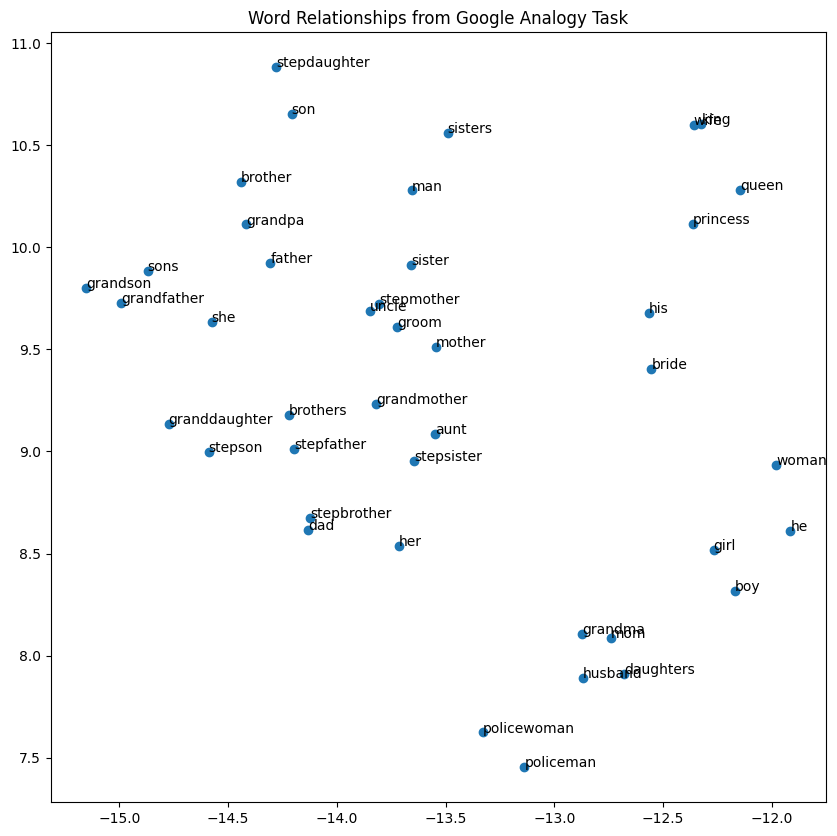

<Figure size 640x480 with 0 Axes>

In [ ]:
# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`
from sklearn.manifold import TSNE

# Definint the t-SNE 2D representation
tsne = TSNE(n_components=2, metric='cosine', random_state=42)

family_vect_data = []
words_to_plot = set()

# Obtaining all the unique words from the analogies in the 'family' subcategory
for analogy in data[data['SubCategory'] == ": family"].iloc[:]["Question"]:
    for word in analogy.split(" "):
        words_to_plot.add(word.lower())

# Obtaining the embedding vectors of the unique words in the subcategory
for word in words_to_plot:
    # Some words are not in the vocabulary, so I needed to filter them
    try:
        family_vect_data.append(word2vec_model.wv[word.lower()])
    except Exception as e:
        print(f"Couldn't get the embeddings: {e}")

# Obtaining the tsne 2D representation of the embeddings
converted_vec = tsne.fit_transform(np.array(family_vect_data))


# Plotting the figure
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(converted_vec[:, 0], converted_vec[:, 1])

# Labeling each point with the related word
for label, x, y in zip(words_to_plot, converted_vec[:, 0], converted_vec[:, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships_new_model.png", bbox_inches="tight")

---
# Additional exercises for the report:

## With 10% Sampling of wiki text

For simplicity I will do the sampling over the already sampled 20%, to reduce processing time.

In [40]:
import pandas as pd

# So 10% from the whole corpus will be 50% from the previously sampled data
english_10_prcnt_articles_df = english_articles_df.sample(frac=0.50, random_state=42, ignore_index=True)
english_10_prcnt_articles_df

,Articles,lang,Tokenized_Articles
0,general sir charles asgill nd baronet april ju...,en,"[general, sir, charles, asgill, nd, baronet, a..."
1,donald harry seccombe born april is former aus...,en,"[donald, harry, seccombe, born, april, austral..."
2,the lafayette leopards men basketball team rep...,en,"[lafayette, leopards, men, basketball, team, r..."
3,thomas wright scott born may is an american sa...,en,"[thomas, wright, scott, born, american, saxoph..."
4,austin watkins jr born february is an american...,en,"[austin, watkins, jr, born, february, american..."
...,...,...,...
557891,the clothed figure the cupid and part of the r...,en,"[clothed, figure, cupid, relief, sacred, profa..."
557892,ricardo adolfo may was filipino boxer he compe...,en,"[ricardo, adolfo, filipino, boxer, competed, s..."
557893,chhandaran is village located in the ludhiana ...,en,"[chhandaran, village, located, ludhiana, east,..."
557894,adenochlaena is genus of plant of the family e...,en,"[adenochlaena, genus, plant, family, euphorbia..."


In [41]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(filename='gensim.log', format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO, force=True)

class MonitorCallback(CallbackAny2Vec):
    def __init__(self, test_words):
        self._test_words = test_words

    def on_epoch_end(self, model):
        print("Model loss:", model.get_latest_training_loss())  # print loss
        # for word in self._test_words:  # show wv logic changes
        #     print(model.wv.most_similar(word))
def get_unique_words(tokenized_articles):
    unique_words = set()
    for article in tqdm(tokenized_articles, desc="Counting unique words..."):
        for word in article:
            unique_words.add(word)
    return unique_words

unique_words = list(get_unique_words(english_10_prcnt_articles_df["Tokenized_Articles"]))
print(f"Amount of unique words: {len(unique_words)}")
monitor = MonitorCallback(["happy", "angry", "news"])
# setting
vector_dim = 100
window_size = 5
min_count = 20
training_epochs = 1
cpu_cores = 32

# model
word2vec_model = Word2Vec(sentences=english_10_prcnt_articles_df["Tokenized_Articles"], 
                          vector_size=vector_dim, window=window_size, workers=cpu_cores,
                          min_count=min_count, epochs=training_epochs, callbacks=[monitor], compute_loss=True)

Counting unique words...: 100%|██████████| 557896/557896 [00:13<00:00, 40312.29it/s]


Amount of unique words: 2837373
Model loss: 9307578.0


In [42]:
word2vec_model.save("wiki_sample_10_prcnt_model")

In [52]:
# To load our model
word2vec_model = Word2Vec.load("wiki_sample_10_prcnt_model")

In [45]:
word2vec_model.wv["happy"]

array([-3.1054216e-02,  5.2593344e-01, -1.3597740e+00,  1.7059054e+00,
       -2.3303339e+00,  5.4220613e-02,  3.3452001e-01, -1.6004421e+00,
       -2.7021480e-01,  1.0259391e+00, -9.2927909e-01,  1.5359315e+00,
        1.3155248e+00, -1.0439502e+00, -1.1734450e+00, -9.7989053e-01,
        3.9819574e-01, -1.3267146e+00,  8.7503821e-01,  2.5190713e+00,
       -1.4624091e+00,  1.5623283e+00, -2.1294515e+00,  1.7436433e+00,
       -5.6474589e-02, -6.7419595e-01, -3.4797031e-01,  8.6408919e-01,
       -3.3237270e-01, -3.7026727e-01,  1.2715334e+00,  1.5237241e+00,
       -1.4794755e+00,  1.2166563e-01,  7.1079314e-01,  7.2900850e-01,
       -5.6783235e-01,  1.8703214e+00,  1.6573189e+00, -4.8012730e-01,
       -9.0074188e-01,  7.4651778e-01, -2.0119898e-01, -7.3286867e-01,
        7.4940723e-01, -7.4161887e-01,  1.4093535e+00, -1.3157696e+00,
       -7.6731944e-01, -2.2104175e+00, -9.6415013e-01, -4.5513436e-01,
        1.7248017e+00,  1.3759550e-01, -1.1534059e+00, -4.7496909e-01,
      

In [53]:
data = pd.read_csv("questions-words.csv")

In [54]:
import pandas as pd
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

data_predictions = data.copy()
data_predictions["Gold"] = None
data_predictions["Prediction"] = None

for index, analogy in tqdm(enumerate(data["Question"]), total = len(data["Question"])):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a = analogy.split(" ")[0].lower()
      word_b = analogy.split(" ")[1].lower()
      word_c = analogy.split(" ")[2].lower()
      word_d = analogy.split(" ")[3].lower()
      try:
            pred = word2vec_model.wv[word_b] + word2vec_model.wv[word_c] - word2vec_model.wv[word_a]
            most_similar = word2vec_model.wv.most_similar(positive = pred, topn = 1)[0][0]
            preds.append(most_similar)
            golds.append(word_d)
            data_predictions.loc[data_predictions.index[index], "Prediction"] = most_similar
            data_predictions.loc[data_predictions.index[index], "Gold"] = word_d
      except Exception as e:
            print(f"Couldn't predict the question: {e}")
            data_predictions.loc[data_predictions.index[index], "Prediction"] = None
            data_predictions.loc[data_predictions.index[index], "Gold"] = None

 29%|██▊       | 5580/19544 [00:31<00:52, 266.01it/s]

Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: "Key 'denar' not present"
Couldn't predict the question: 

 43%|████▎     | 8395/19544 [00:47<00:57, 194.46it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 43%|████▎     | 8435/19544 [00:47<00:56, 196.72it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 43%|████▎     | 8476/19544 [00:48<00:55, 200.15it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▎     | 8518/19544 [00:48<00:54, 202.99it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▍     | 8560/19544 [00:48<00:54, 199.86it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't pr

 44%|████▍     | 8654/19544 [00:48<00:39, 275.98it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▍     | 8683/19544 [00:48<00:43, 250.13it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▍     | 8734/19544 [00:49<00:46, 230.61it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▍     | 8781/19544 [00:49<00:49, 216.38it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▌     | 8825/19544 [00:49<00:50, 210.72it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▌     | 8868/19544 [00:49<00:51, 208.06it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 46%|████▌     | 8910/19544 [00:50<00:54, 196.37it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 46%|████▌     | 8951/19544 [00:50<00:53, 198.15it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8991/19544 [00:50<00:53, 196.57it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 46%|████▋     | 9051/19544 [00:50<00:53, 197.14it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9091/19544 [00:50<00:53, 196.26it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 47%|████▋     | 9132/19544 [00:51<00:52, 198.58it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9174/19544 [00:51<00:51, 199.61it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 47%|████▋     | 9216/19544 [00:51<00:53, 193.64it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9306/19544 [00:51<00:36, 279.79it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predic

 48%|████▊     | 9335/19544 [00:52<00:40, 250.63it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9385/19544 [00:52<00:46, 219.50it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9451/19544 [00:52<00:49, 203.02it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 49%|████▊     | 9493/19544 [00:52<00:49, 201.78it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9535/19544 [00:53<00:51, 196.04it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 49%|████▉     | 9576/19544 [00:53<00:50, 196.82it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9637/19544 [00:53<00:50, 196.72it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Cou

 50%|████▉     | 9686/19544 [00:53<00:35, 279.34it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|████▉     | 9741/19544 [00:53<00:42, 232.91it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 50%|█████     | 9788/19544 [00:54<00:45, 216.06it/s]

Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9832/19544 [00:54<00:47, 206.34it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"


 51%|█████     | 9893/19544 [00:54<00:49, 194.43it/s]

Couldn't predict the question: "Key 'serious' not present"


 53%|█████▎    | 10322/19544 [00:56<00:34, 267.32it/s]

Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the ques

 66%|██████▋   | 12977/19544 [01:11<00:23, 276.46it/s]

Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tas

 67%|██████▋   | 13156/19544 [01:12<00:33, 193.08it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"


 68%|██████▊   | 13220/19544 [01:12<00:30, 204.33it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13262/19544 [01:12<00:31, 201.12it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"


 68%|██████▊   | 13304/19544 [01:12<00:31, 200.22it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 68%|██████▊   | 13347/19544 [01:13<00:30, 203.56it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"


 69%|██████▊   | 13390/19544 [01:13<00:30, 200.77it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13463/19544 [01:13<00:20, 293.51it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the que

 69%|██████▉   | 13521/19544 [01:13<00:24, 242.56it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13571/19544 [01:14<00:27, 216.69it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"


 70%|██████▉   | 13594/19544 [01:14<00:27, 217.29it/s]

Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|███████   | 13689/19544 [01:14<00:21, 274.23it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not prese

 70%|███████   | 13745/19544 [01:14<00:24, 238.44it/s]

Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 71%|███████   | 13794/19544 [01:15<00:26, 215.07it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't p

 71%|███████   | 13898/19544 [01:15<00:16, 349.94it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't p

 71%|███████▏  | 13935/19544 [01:15<00:19, 293.21it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"


 72%|███████▏  | 13995/19544 [01:15<00:23, 239.59it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14045/19544 [01:16<00:24, 220.13it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"


 72%|███████▏  | 14068/19544 [01:16<00:25, 217.30it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 72%|███████▏  | 14137/19544 [01:16<00:25, 215.05it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"


 73%|███████▎  | 14182/19544 [01:16<00:24, 215.25it/s]

Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18721/19544 [01:41<00:04, 200.31it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18763/19544 [01:41<00:03, 196.09it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▋| 18827/19544 [01:42<00:03, 196.13it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18870/19544 [01:42<00:03, 202.45it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the que

 97%|█████████▋| 18974/19544 [01:42<00:02, 240.22it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 19023/19544 [01:42<00:02, 218.69it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 98%|█████████▊| 19068/19544 [01:43<00:02, 205.13it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't pre

 98%|█████████▊| 19172/19544 [01:43<00:01, 245.23it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't pre

 98%|█████████▊| 19245/19544 [01:43<00:01, 256.38it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▊| 19299/19544 [01:44<00:01, 229.65it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19346/19544 [01:44<00:00, 217.97it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19413/19544 [01:44<00:00, 210.03it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19478/19544 [01:44<00:00, 206.21it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19520/19544 [01:45<00:00, 199.21it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|██████████| 19544/19544 [01:45<00:00, 185.58it/s]


In [47]:
# There were many questions that could not be answer this time due to either the word being filtered as it is considered a stopword
# Or maybe because it was infrequent (filtered min freq of 20) or because it was not inside the sampled part of the corpus

print(f"Total amount of data predicted: {len(preds)}/{len(data["Question"])}")

Total amount of data predicted: 18834/19544


In [55]:
# Gemini helped me code this to get the data on the Nones per category and subcategory: 
for category in data_predictions["Category"].unique():
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    
    # Count of Nones for the category
    nones_per_category = masked_df['Prediction'].isnull().sum()
    print(f"Category: {category}, Count of Nones: {nones_per_category}")

for subcategory in data_predictions["SubCategory"].unique():
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==subcategory]
    
    # Count of Nones for the category
    nones_per_subcategory = masked_df['Prediction'].isnull().sum()
    print(f"Sub-Category{subcategory}, Count of Nones: {nones_per_subcategory}")

Category: Semantic, Count of Nones: 115
Category: Syntactic, Count of Nones: 595
Sub-Category: capital-common-countries, Count of Nones: 0
Sub-Category: capital-world, Count of Nones: 0
Sub-Category: currency, Count of Nones: 29
Sub-Category: city-in-state, Count of Nones: 0
Sub-Category: family, Count of Nones: 86
Sub-Category: gram1-adjective-to-adverb, Count of Nones: 122
Sub-Category: gram2-opposite, Count of Nones: 28
Sub-Category: gram3-comparative, Count of Nones: 0
Sub-Category: gram4-superlative, Count of Nones: 33
Sub-Category: gram5-present-participle, Count of Nones: 244
Sub-Category: gram6-nationality-adjective, Count of Nones: 0
Sub-Category: gram7-past-tense, Count of Nones: 0
Sub-Category: gram8-plural, Count of Nones: 0
Sub-Category: gram9-plural-verbs, Count of Nones: 168


In [48]:
import numpy as np
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
# data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data_predictions["Category"].unique():
    # mask = data_predictions["Category"] == category 
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    # golds_cat = masked_df.loc[~masked_df["Gold"].isna()].to_numpy()
    # preds_cat = masked_df.loc[~masked_df["Prediction"].isna()].to_numpy()
    golds_cat = masked_df["Gold"].to_numpy()
    preds_cat = masked_df["Prediction"].to_numpy()
    # golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data_predictions["SubCategory"].unique():
    # mask = data_predictions["SubCategory"] == sub_category
    # golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==sub_category]
    golds_subcat = masked_df["Gold"].to_numpy()
    preds_subcat = masked_df["Prediction"].to_numpy()
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 18.074191002367797%
Category: Syntactic, Accuracy: 18.491803278688522%
Sub-Category: capital-common-countries, Accuracy: 52.76679841897233%
Sub-Category: capital-world, Accuracy: 19.82758620689655%
Sub-Category: currency, Accuracy: 3.9260969976905313%
Sub-Category: city-in-state, Accuracy: 7.458451560599919%
Sub-Category: family, Accuracy: 43.67588932806324%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 14.818548387096776%
Sub-Category: gram2-opposite, Accuracy: 3.9408866995073892%
Sub-Category: gram3-comparative, Accuracy: 5.18018018018018%
Sub-Category: gram4-superlative, Accuracy: 5.614973262032086%
Sub-Category: gram5-present-participle, Accuracy: 24.71590909090909%
Sub-Category: gram6-nationality-adjective, Accuracy: 64.79049405878673%
Sub-Category: gram7-past-tense, Accuracy: 5.32051282051282%
Sub-Category: gram8-plural, Accuracy: 4.504504504504505%
Sub-Category: gram9-plural-verbs, Accuracy: 25.632183908045974%


## With 5% Sampling of wiki text
The same as before, for simplicity I will do the sampling over the already sampled 20%, to reduce processing time.

In [49]:
import pandas as pd

# So 5% from the whole corpus will be 25% from the previously sampled data
english_5_prcnt_articles_df = english_articles_df.sample(frac=0.25, random_state=42, ignore_index=True)
english_5_prcnt_articles_df

,Articles,lang,Tokenized_Articles
0,general sir charles asgill nd baronet april ju...,en,"[general, sir, charles, asgill, nd, baronet, a..."
1,donald harry seccombe born april is former aus...,en,"[donald, harry, seccombe, born, april, austral..."
2,the lafayette leopards men basketball team rep...,en,"[lafayette, leopards, men, basketball, team, r..."
3,thomas wright scott born may is an american sa...,en,"[thomas, wright, scott, born, american, saxoph..."
4,austin watkins jr born february is an american...,en,"[austin, watkins, jr, born, february, american..."
...,...,...,...
278943,mushtaq ahmad tantray born august is an indian...,en,"[mushtaq, ahmad, tantray, born, august, indian..."
278944,the huangdi yinfujing or yinfujing is circa th...,en,"[huangdi, yinfujing, yinfujing, circa, th, cen..."
278945,college hockey in the formerly college hockey ...,en,"[college, hockey, college, hockey, joe, series..."
278946,julie disalvatore march august was an american...,en,"[julie, disalvatore, march, august, american, ..."


In [50]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(filename='gensim.log', format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO, force=True)

class MonitorCallback(CallbackAny2Vec):
    def __init__(self, test_words):
        self._test_words = test_words

    def on_epoch_end(self, model):
        print("Model loss:", model.get_latest_training_loss())  # print loss
        # for word in self._test_words:  # show wv logic changes
        #     print(model.wv.most_similar(word))
def get_unique_words(tokenized_articles):
    unique_words = set()
    for article in tqdm(tokenized_articles, desc="Counting unique words..."):
        for word in article:
            unique_words.add(word)
    return unique_words

unique_words = list(get_unique_words(english_5_prcnt_articles_df["Tokenized_Articles"]))
print(f"Amount of unique words: {len(unique_words)}")
monitor = MonitorCallback(["happy", "angry", "news"])
# setting
vector_dim = 100
window_size = 5
min_count = 20
training_epochs = 1
cpu_cores = 32

# model
word2vec_model = Word2Vec(sentences=english_5_prcnt_articles_df["Tokenized_Articles"], 
                          vector_size=vector_dim, window=window_size, workers=cpu_cores,
                          min_count=min_count, epochs=training_epochs, callbacks=[monitor], compute_loss=True)

Counting unique words...: 100%|██████████| 278948/278948 [00:06<00:00, 41779.39it/s]


Amount of unique words: 1854329
Model loss: 5155272.5


In [51]:
word2vec_model.save("wiki_sample_5_prcnt_model")

In [56]:
# To load our model
word2vec_model = Word2Vec.load("wiki_sample_5_prcnt_model")

In [57]:
word2vec_model.wv["happy"]

array([ 1.2531934 , -0.60970706, -1.6972222 ,  1.1321999 , -0.7013545 ,
       -1.0389222 , -0.6481034 , -1.1084787 ,  0.6016991 , -0.40009665,
       -0.05134883, -1.3244785 , -0.14683814,  0.9162393 ,  1.7177523 ,
       -1.2896847 , -1.5219865 , -0.8788166 , -1.2842586 ,  1.2131377 ,
        0.43894833,  1.18069   , -0.3146951 ,  0.4989162 , -0.7972821 ,
       -2.1296265 , -0.9133845 , -1.9903383 , -1.8789116 ,  0.4679077 ,
       -0.8592553 ,  0.04049745, -0.91140777, -0.6074254 ,  0.40911132,
        1.5830647 , -0.34310785, -0.19040594,  0.77427155, -2.1049426 ,
       -0.6355858 , -1.2607429 ,  1.1591928 ,  0.45357957,  0.14617474,
        0.5453712 , -0.74551547,  0.38628066, -0.27267122, -1.6993834 ,
        0.64953905, -1.0428073 ,  2.8547776 , -0.9557932 ,  0.9287796 ,
       -2.2000227 ,  0.42463318,  1.0469722 , -1.3528315 ,  1.4018488 ,
        1.5201907 ,  0.56366086, -0.38363189, -0.798445  , -0.20675184,
       -0.12797993, -0.8022123 , -0.55211496, -0.34121293, -0.63

In [58]:
data = pd.read_csv("questions-words.csv")

In [59]:
import pandas as pd
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

data_predictions = data.copy()
data_predictions["Gold"] = None
data_predictions["Prediction"] = None

for index, analogy in tqdm(enumerate(data["Question"]), total = len(data["Question"])):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a = analogy.split(" ")[0].lower()
      word_b = analogy.split(" ")[1].lower()
      word_c = analogy.split(" ")[2].lower()
      word_d = analogy.split(" ")[3].lower()
      try:
            pred = word2vec_model.wv[word_b] + word2vec_model.wv[word_c] - word2vec_model.wv[word_a]
            most_similar = word2vec_model.wv.most_similar(positive = pred, topn = 1)[0][0]
            preds.append(most_similar)
            golds.append(word_d)
            data_predictions.loc[data_predictions.index[index], "Prediction"] = most_similar
            data_predictions.loc[data_predictions.index[index], "Gold"] = word_d
      except Exception as e:
            print(f"Couldn't predict the question: {e}")
            data_predictions.loc[data_predictions.index[index], "Prediction"] = None
            data_predictions.loc[data_predictions.index[index], "Gold"] = None

 29%|██▉       | 5632/19544 [00:13<00:22, 612.64it/s]

Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not present"
Couldn't predict the question: "Key 'lats' not p

 29%|██▉       | 5765/19544 [00:14<00:25, 550.98it/s]

Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: "Key 'zloty' not present"
Couldn't predict the question: 

 43%|████▎     | 8428/19544 [00:21<00:26, 427.28it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 44%|████▍     | 8559/19544 [00:22<00:25, 430.04it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predict the question: "Key 'she' not present"
Couldn't predi

 44%|████▍     | 8697/19544 [00:22<00:20, 520.38it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 45%|████▌     | 8801/19544 [00:22<00:23, 461.33it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"


 46%|████▌     | 8894/19544 [00:22<00:23, 450.72it/s]

Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▌     | 8985/19544 [00:22<00:24, 432.89it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 46%|████▋     | 9075/19544 [00:23<00:23, 438.51it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9163/19544 [00:23<00:23, 435.52it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 47%|████▋     | 9251/19544 [00:23<00:23, 435.64it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 48%|████▊     | 9374/19544 [00:23<00:20, 489.67it/s]

Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predict the question: "Key 'mostly' not present"
Couldn't predi

 48%|████▊     | 9472/19544 [00:23<00:21, 465.05it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 49%|████▉     | 9565/19544 [00:24<00:22, 450.11it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|████▉     | 9680/19544 [00:24<00:19, 500.96it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn

 50%|█████     | 9780/19544 [00:24<00:20, 469.70it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 50%|█████     | 9828/19544 [00:24<00:21, 459.16it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"


 53%|█████▎    | 10360/19544 [00:26<00:26, 349.02it/s]

Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the question: "Key 'uninformative' not present"
Couldn't predict the ques

 67%|██████▋   | 13042/19544 [00:33<00:14, 463.16it/s]

Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tas

 67%|██████▋   | 13183/19544 [00:34<00:14, 451.16it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"


 68%|██████▊   | 13323/19544 [00:34<00:13, 457.20it/s]

Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"


 68%|██████▊   | 13369/19544 [00:34<00:13, 455.25it/s]

Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 69%|██████▉   | 13493/19544 [00:34<00:11, 520.31it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the que

 70%|██████▉   | 13597/19544 [00:35<00:12, 473.81it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 70%|███████   | 13730/19544 [00:35<00:11, 524.57it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not prese

 71%|███████   | 13859/19544 [00:35<00:09, 572.84it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't p

 72%|███████▏  | 13995/19544 [00:35<00:09, 566.02it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"


 72%|███████▏  | 14054/19544 [00:35<00:10, 531.81it/s]

Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"


 72%|███████▏  | 14161/19544 [00:36<00:10, 496.00it/s]

Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 96%|█████████▌| 18773/19544 [00:47<00:01, 423.98it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"


 97%|█████████▋| 18863/19544 [00:48<00:01, 436.15it/s]

Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 97%|█████████▋| 18985/19544 [00:48<00:01, 489.05it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the quest

 97%|█████████▋| 19035/19544 [00:48<00:01, 457.13it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"


 98%|█████████▊| 19148/19544 [00:48<00:00, 509.62it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't p

 99%|█████████▊| 19275/19544 [00:48<00:00, 525.98it/s]

Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


 99%|█████████▉| 19381/19544 [00:49<00:00, 493.88it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"


100%|█████████▉| 19481/19544 [00:49<00:00, 483.77it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"


100%|██████████| 19544/19544 [00:49<00:00, 395.49it/s]

Couldn't predict the question: "Key 'see' not present"


In [56]:
# There were many questions that could not be answer this time due to either the word being filtered as it is considered a stopword
# Or maybe because it was infrequent (filtered min freq of 20) or because it was not inside the sampled part of the corpus

print(f"Total amount of data predicted: {len(preds)}/{len(data["Question"])}")

Total amount of data predicted: 18747/19544


In [60]:
# Gemini helped me code this to get the data on the Nones per category and subcategory: 
for category in data_predictions["Category"].unique():
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    
    # Count of Nones for the category
    nones_per_category = masked_df['Prediction'].isnull().sum()
    print(f"Category: {category}, Count of Nones: {nones_per_category}")

for subcategory in data_predictions["SubCategory"].unique():
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==subcategory]
    
    # Count of Nones for the category
    nones_per_subcategory = masked_df['Prediction'].isnull().sum()
    print(f"Sub-Category{subcategory}, Count of Nones: {nones_per_subcategory}")

Category: Semantic, Count of Nones: 202
Category: Syntactic, Count of Nones: 595
Sub-Category: capital-common-countries, Count of Nones: 0
Sub-Category: capital-world, Count of Nones: 0
Sub-Category: currency, Count of Nones: 116
Sub-Category: city-in-state, Count of Nones: 0
Sub-Category: family, Count of Nones: 86
Sub-Category: gram1-adjective-to-adverb, Count of Nones: 122
Sub-Category: gram2-opposite, Count of Nones: 28
Sub-Category: gram3-comparative, Count of Nones: 0
Sub-Category: gram4-superlative, Count of Nones: 33
Sub-Category: gram5-present-participle, Count of Nones: 244
Sub-Category: gram6-nationality-adjective, Count of Nones: 0
Sub-Category: gram7-past-tense, Count of Nones: 0
Sub-Category: gram8-plural, Count of Nones: 0
Sub-Category: gram9-plural-verbs, Count of Nones: 168


In [57]:
import numpy as np
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
# data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data_predictions["Category"].unique():
    # mask = data_predictions["Category"] == category 
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    # golds_cat = masked_df.loc[~masked_df["Gold"].isna()].to_numpy()
    # preds_cat = masked_df.loc[~masked_df["Prediction"].isna()].to_numpy()
    golds_cat = masked_df["Gold"].to_numpy()
    preds_cat = masked_df["Prediction"].to_numpy()
    # golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data_predictions["SubCategory"].unique():
    # mask = data_predictions["SubCategory"] == sub_category
    # golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==sub_category]
    golds_subcat = masked_df["Gold"].to_numpy()
    preds_subcat = masked_df["Prediction"].to_numpy()
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 11.929191566129214%
Category: Syntactic, Accuracy: 15.943793911007026%
Sub-Category: capital-common-countries, Accuracy: 38.73517786561265%
Sub-Category: capital-world, Accuracy: 10.521662245800178%
Sub-Category: currency, Accuracy: 13.625866050808314%
Sub-Category: city-in-state, Accuracy: 2.959059586542359%
Sub-Category: family, Accuracy: 38.537549407114625%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 13.608870967741934%
Sub-Category: gram2-opposite, Accuracy: 3.6945812807881775%
Sub-Category: gram3-comparative, Accuracy: 4.2042042042042045%
Sub-Category: gram4-superlative, Accuracy: 4.991087344028521%
Sub-Category: gram5-present-participle, Accuracy: 24.053030303030305%
Sub-Category: gram6-nationality-adjective, Accuracy: 53.97123202001251%
Sub-Category: gram7-past-tense, Accuracy: 3.782051282051282%
Sub-Category: gram8-plural, Accuracy: 4.129129129129129%
Sub-Category: gram9-plural-verbs, Accuracy: 22.298850574712645%


---
## Training with different corpora

In [1]:
import gensim.downloader as api
corpus = api.load('semeval-2016-2017-task3-subtaskA-unannotated')
corpus

<semeval-2016-2017-task3-subtaskA-unannotated.Dataset at 0x7f7e5019b710>

In [2]:
for doc in corpus:
    print(doc)
    break

{'RelComments': [{'RelCText': 'have they blocked porn??? <img src="http://www.qatarliving.com/files/images/Da.gif">', 'RELC_USERID': 'U210', 'RELC_ID': 'Q1_C1', 'RELC_USERNAME': 'DaRuDe', 'RELC_DATE': '2009-12-14 12:00:59'}, {'RelCText': "like trying to contain a tsunami with a hand towel ************************************ I'm Jack's complete lack of surprise", 'RELC_USERID': 'U2', 'RELC_ID': 'Q1_C2', 'RELC_USERNAME': 'anonymous', 'RELC_DATE': '2009-12-14 12:07:04'}, {'RelCText': 'oops double post.. ----------------- "HE WHO DARES WINS" Derek Edward Trotter', 'RELC_USERID': 'U114', 'RELC_ID': 'Q1_C3', 'RELC_USERNAME': 'GodFather.', 'RELC_DATE': '2009-12-14 12:09:23'}, {'RelCText': 'What next they gonna ban all *** tourist from entering the country? ----------------- "HE WHO DARES WINS" Derek Edward Trotter', 'RELC_USERID': 'U114', 'RELC_ID': 'Q1_C4', 'RELC_USERNAME': 'GodFather.', 'RELC_DATE': '2009-12-14 12:09:52'}, {'RelCText': 'Or you can always make your own there with some thai 

In [3]:
from tqdm import tqdm
# I used gemini to helped me iterate over the corpus of data
training_texts = []
for doc in tqdm(corpus, desc="Appending corpus text..."):
    # Append the question's subject and body
    text_doc = ""
    text_doc += doc['RelQuestion']['RelQSubject']
    text_doc += doc['RelQuestion']['RelQBody']
    # training_texts.append(doc['RelQuestion']['RelQSubject'])
    # training_texts.append(doc['RelQuestion']['RelQBody'])
    
    # Iterate through the comments and append their text
    for comment in doc['RelComments']:
        text_doc += comment['RelCText']
        # training_texts.append(comment['RelCText'])
    training_texts.append(text_doc)

print(training_texts[:10])

Appending corpus text...: 189941it [00:08, 21115.98it/s]

['Thailand:IT Minsitry blocks CNN; Facebook;The state of Internet in Thailand:IT Minsitry blocks CNN; Facebook; Yahoo; Flickr Thai Immigration website listed as dangerousFull story: http://www.thaivisa.com/forum/Thai-Govt-Blocks-Cnn-Yahoo-Financ-t321851.htmlhave they blocked porn??? <img src="http://www.qatarliving.com/files/images/Da.gif">like trying to contain a tsunami with a hand towel ************************************ I\'m Jack\'s complete lack of surpriseoops double post.. ----------------- "HE WHO DARES WINS" Derek Edward TrotterWhat next they gonna ban all *** tourist from entering the country? ----------------- "HE WHO DARES WINS" Derek Edward TrotterOr you can always make your own there with some thai babys Rules are a guideline for intelligent people; but they must be adhered to by idiots.why CNN? they want to die ignorant of what happens around?', 'Gay and marriedI am considering to take on a job opportunity in Doha however as I am married with my male partner who is not

In [4]:
# Converting the list into pandas dataframe
import pandas as pd
corpus_text_df = pd.DataFrame(
    {
        "CorpusText": training_texts,
    }
)

In [5]:
corpus_text_df

,CorpusText
0,Thailand:IT Minsitry blocks CNN; Facebook;The ...
1,Gay and marriedI am considering to take on a j...
2,KahraMaa Timings... are they open in evenings?...
3,for all mums and mums to be...Does anybody her...
4,Once again I'm back to my passionThree months ...
...,...
189936,Smart childOne day a 6 year old girl was sitti...
189937,Not for Dirty Mind Qlers :PTake it easy 1. BOO...
189938,Need HelpHi all; I'm new here and wanted to sh...
189939,"Video of 17yr-old Swat girl's flogging ""FAKE""M..."


In [6]:
from fast_langdetect import detect

def detect_english(text: str)->str:
    return detect(text, model="auto", k=1)[0]['lang']

print(detect_english("Hello my friend!"))

en


In [8]:
tqdm.pandas()
# Gemini helped me in articulating the lambda function
corpus_text_df['lang'] = corpus_text_df['CorpusText'].apply(lambda x: detect_english(x))

# Filter for English articles
english_corpus_df = corpus_text_df[corpus_text_df['lang'] == 'en'].copy()
print(f"Found {len(english_corpus_df)} English text.")

Found 189119 English text.


In [9]:
english_corpus_df["Tokenized_Corpus"] = None
english_corpus_df

,CorpusText,lang,Tokenized_Corpus
1,Gay and marriedI am considering to take on a j...,en,None
2,KahraMaa Timings... are they open in evenings?...,en,None
3,for all mums and mums to be...Does anybody her...,en,None
4,Once again I'm back to my passionThree months ...,en,None
5,traffic violation in Barwa Housingtoday mornin...,en,None
...,...,...,...
189936,Smart childOne day a 6 year old girl was sitti...,en,None
189937,Not for Dirty Mind Qlers :PTake it easy 1. BOO...,en,None
189938,Need HelpHi all; I'm new here and wanted to sh...,en,None
189939,"Video of 17yr-old Swat girl's flogging ""FAKE""M...",en,None


In [10]:
english_corpus_df.to_pickle("corpus_english_text.pkl")

In [11]:
import pandas as pd
english_corpus_df = pd.read_pickle('corpus_english_text.pkl')

In [14]:
from tqdm import tqdm
import spacy

spacy.require_gpu() # To use GPU
nlp = spacy.load("en_core_web_sm", disable=['tagger', 'parser', 'ner', 'senter', 'attribute_ruler'], exclude=['tagger', 'parser', 'ner', 'senter', 'attribute_ruler'])
nlp.add_pipe("doc_cleaner", last=True) 
nlp.max_length = 1300000
def validate_pipe(doc):
    lemma_list = [token.lemma_.lower() for token in doc if not token.is_stop]
    return lemma_list

def preprocess_pipe(texts, batch_size=110):
    processed_docs = []
    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size), desc="Tokenizing articles...", total = int(len(texts)/batch_size)):
        processed_docs.append(validate_pipe(doc))

    return processed_docs

In [15]:
english_corpus_df["Tokenized_Corpus"] = preprocess_pipe(english_corpus_df["CorpusText"])

Tokenizing articles...: 189119it [09:30, 331.50it/s]                        


In [16]:
english_corpus_df.to_pickle("corpus_eng_tknzd_text.pkl")

In [18]:
from gensim.models.word2vec import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(filename='gensim.log', format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO, force=True)

class MonitorCallback(CallbackAny2Vec):
    def __init__(self, test_words):
        self._test_words = test_words

    def on_epoch_end(self, model):
        print("Model loss:", model.get_latest_training_loss())  # print loss
        # for word in self._test_words:  # show wv logic changes
        #     print(model.wv.most_similar(word))

monitor = MonitorCallback(["happy", "angry", "news"])
# setting
vector_dim = 100
window_size = 5
min_count = 20
training_epochs = 1
cpu_cores = 32

word2vec_model = Word2Vec(sentences=english_corpus_df["Tokenized_Corpus"], 
                          vector_size=vector_dim, window=window_size, workers=cpu_cores,
                          min_count=min_count, epochs=training_epochs, callbacks=[monitor], compute_loss=True)

Model loss: 2390701.25


In [19]:
word2vec_model.save("semeval_model")

In [20]:
# To load our model
word2vec_model = Word2Vec.load("semeval_model")

In [21]:
vocabulary = list(word2vec_model.wv.key_to_index.keys())[:50]
print(vocabulary)

['.', ';', '_', '"', '-', '/', '...', '?', '>', '!', ':', '<', '*', '=', '..', ')', '(', 'know', 'qatar', 'like', 'u', 'good', '....', 'people', "'", 'time', 'think', 'nt', 'need', 'family', ':)', 'doha', 'want', 'new', 'visa', 'said', 'life', 'right', '&', 'way', '2', 'find', 'work', 'day', 'help', 'love', 'got', 'car', 'come', '\xa0']


In [ ]:
word2vec_model.wv["happy"]

array([-0.33256772,  0.14288962,  0.20740642,  0.23955165,  0.27064785,
       -0.24909312,  0.05471938,  0.2530698 , -0.12384341, -0.24262755,
       -0.00203142, -0.3265763 , -0.22080478,  0.2877032 ,  0.12191519,
        0.27113914,  0.27006593,  0.29629847, -0.1674414 , -0.04430968,
        0.10277764, -0.16510531,  0.3353746 , -0.3813787 ,  0.27746445,
        0.10250413, -0.18783216,  0.18396938, -0.0861042 ,  0.25143206,
        0.369542  , -0.17318103, -0.00593808, -0.23591131,  0.13907243,
        0.1022551 ,  0.2821834 ,  0.223367  ,  0.3675505 ,  0.3459568 ,
        0.2804573 , -0.25719532, -0.3713395 , -0.01999531, -0.11744067,
        0.30501676,  0.21253273, -0.03999012,  0.06680788,  0.08822765,
        0.2837185 , -0.35724473, -0.02007272,  0.13157341, -0.0220276 ,
        0.30996472,  0.3553648 ,  0.23474845, -0.03798361,  0.31500253,
       -0.32958928,  0.12228974, -0.18339005, -0.21151406,  0.13144432,
        0.21617872,  0.30037594, -0.20729645,  0.2767734 ,  0.26

In [22]:
data = pd.read_csv("questions-words.csv")

In [23]:
import pandas as pd
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

data_predictions = data.copy()
data_predictions["Gold"] = None
data_predictions["Prediction"] = None

for index, analogy in tqdm(enumerate(data["Question"]), total = len(data["Question"])):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      word_a = analogy.split(" ")[0].lower()
      word_b = analogy.split(" ")[1].lower()
      word_c = analogy.split(" ")[2].lower()
      word_d = analogy.split(" ")[3].lower()
      try:
            pred = word2vec_model.wv[word_b] + word2vec_model.wv[word_c] - word2vec_model.wv[word_a]
            most_similar = word2vec_model.wv.most_similar(positive = pred, topn = 1)[0][0]
            preds.append(most_similar)
            golds.append(word_d)
            data_predictions.loc[data_predictions.index[index], "Prediction"] = most_similar
            data_predictions.loc[data_predictions.index[index], "Gold"] = word_d
      except Exception as e:
            print(f"Couldn't predict the question: {e}")
            data_predictions.loc[data_predictions.index[index], "Prediction"] = None
            data_predictions.loc[data_predictions.index[index], "Gold"] = None

  5%|▍         | 935/19544 [00:00<00:08, 2168.48it/s]

Couldn't predict the question: "Key 'accra' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'antananarivo' not present"
Couldn't predict the question: "Key 'apia' not present"
Couldn't predict the question: "Key 'ashgabat' not present"
Couldn't predict the question: "Key 'asmara' not present"
Couldn't predict the question: "Key 'astana' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'bamako' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict t

  7%|▋         | 1379/19544 [00:00<00:08, 2181.01it/s]

Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'kampala' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'kigali' not present"
Couldn't predict the question: "Key 'belmopan' not present"
Couldn't predict the question: "Key 'bishkek' not present"
Couldn't predict the question: "Key 'bratislava' not present"
Couldn't predict the question: "Key 'bujumbura' not present"
Couldn't predict the question: "Key 'chisinau' not present"
Couldn't predict the question: "Key 'conakry' not present"
Couldn't predict the question: "Key 'dushanbe' not present

 10%|▉         | 1871/19544 [00:00<00:07, 2325.84it/s]

Couldn't predict the question: "Key 'bujumbura' not present"
Couldn't predict the question: "Key 'libreville' not present"
Couldn't predict the question: "Key 'lilongwe' not present"
Couldn't predict the question: "Key 'bujumbura' not present"
Couldn't predict the question: "Key 'bujumbura' not present"
Couldn't predict the question: "Key 'ljubljana' not present"
Couldn't predict the question: "Key 'bujumbura' not present"
Couldn't predict the question: "Key 'luanda' not present"
Couldn't predict the question: "Key 'lusaka' not present"
Couldn't predict the question: "Key 'bujumbura' not present"
Couldn't predict the question: "Key 'managua' not present"
Couldn't predict the question: "Key 'bujumbura' not present"
Couldn't predict the question: "Key 'chisinau' not present"
Couldn't predict the question: "Key 'conakry' not present"
Couldn't predict the question: "Key 'dushanbe' not present"
Couldn't predict the question: "Key 'funafuti' not present"
Couldn't predict the question: "Key '

 12%|█▏        | 2396/19544 [00:01<00:07, 2435.08it/s]

Couldn't predict the question: "Key 'managua' not present"
Couldn't predict the question: "Key 'gaborone' not present"
Couldn't predict the question: "Key 'gaborone' not present"
Couldn't predict the question: "Key 'maputo' not present"
Couldn't predict the question: "Key 'minsk' not present"
Couldn't predict the question: "Key 'gaborone' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'montevideo' not present"
Couldn't predict the question: "Key 'gaborone' not present"
Couldn't predict the question: "Key 'gaborone' not present"
Couldn't predict the question: "Key 'gaborone' not present"
Couldn't predict the question: "Key 'nassau' not present"
Couldn't predict the question: "Key 'niamey' not present"
Couldn't predict the question: "Key 'nicosia' not present"
Couldn't predict the question: "Key 'nouakchott' not present"
Couldn't predict the question: "Key 'nuuk' not present"
Couldn't predict the question: "Key 'harare' not pr

 15%|█▌        | 3008/19544 [00:01<00:05, 2785.25it/s]

Couldn't predict the question: "Key 'ljubljana' not present"
Couldn't predict the question: "Key 'luanda' not present"
Couldn't predict the question: "Key 'lusaka' not present"
Couldn't predict the question: "Key 'managua' not present"
Couldn't predict the question: "Key 'maputo' not present"
Couldn't predict the question: "Key 'minsk' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'montevideo' not present"
Couldn't predict the question: "Key 'nassau' not present"
Couldn't predict the question: "Key 'niamey' not present"
Couldn't predict the question: "Key 'nicosia' not present"
Couldn't predict the question: "Key 'nouakchott' not present"
Couldn't predict the question: "Key 'nuuk' not present"
Couldn't predict the question: "Key 'paramaribo' not present"
Couldn't predict the question: "Key 'podgorica' not present"
Couldn't predict the question: "Key 'quito' not present"
Couldn't predict the question: "Key 'riga' not present

 19%|█▊        | 3653/19544 [00:01<00:05, 3046.38it/s]

Couldn't predict the question: "Key 'vaduz' not present"
Couldn't predict the question: "Key 'valletta' not present"
Couldn't predict the question: "Key 'montevideo' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'nassau' not present"
Couldn't predict the question: "Key 'niamey' not present"
Couldn't predict the question: "Key 'nicosia' not present"
Couldn't predict the question: "Key 'nouakchott' not present"
Couldn't predict the question: "Key 'nuuk' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'paramaribo' not present"
Couldn't predict the question: "Key 'monrovia' not present"
Couldn't predict the question: "Key 'podgorica' not present"
Couldn't predict the question: "Key 'quito' n

 22%|██▏       | 4297/19544 [00:01<00:04, 3121.81it/s]

Couldn't predict the question: "Key 'suva' not present"
Couldn't predict the question: "Key 'tallinn' not present"
Couldn't predict the question: "Key 'tashkent' not present"
Couldn't predict the question: "Key 'tbilisi' not present"
Couldn't predict the question: "Key 'tegucigalpa' not present"
Couldn't predict the question: "Key 'thimphu' not present"
Couldn't predict the question: "Key 'tirana' not present"
Couldn't predict the question: "Key 'vaduz' not present"
Couldn't predict the question: "Key 'valletta' not present"
Couldn't predict the question: "Key 'vientiane' not present"
Couldn't predict the question: "Key 'vilnius' not present"
Couldn't predict the question: "Key 'windhoek' not present"
Couldn't predict the question: "Key 'yerevan' not present"
Couldn't predict the question: "Key 'zagreb' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'accra' not present"
Couldn't predict the question: "Key 'antananarivo' not pre

 25%|██▌       | 4971/19544 [00:01<00:04, 3239.75it/s]

Couldn't predict the question: "Key 'vaduz' not present"
Couldn't predict the question: "Key 'valletta' not present"
Couldn't predict the question: "Key 'vientiane' not present"
Couldn't predict the question: "Key 'vilnius' not present"
Couldn't predict the question: "Key 'windhoek' not present"
Couldn't predict the question: "Key 'yerevan' not present"
Couldn't predict the question: "Key 'zagreb' not present"
Couldn't predict the question: "Key 'abuja' not present"
Couldn't predict the question: "Key 'accra' not present"
Couldn't predict the question: "Key 'antananarivo' not present"
Couldn't predict the question: "Key 'apia' not present"
Couldn't predict the question: "Key 'ashgabat' not present"
Couldn't predict the question: "Key 'asmara' not present"
Couldn't predict the question: "Key 'astana' not present"
Couldn't predict the question: "Key 'bamako' not present"
Couldn't predict the question: "Key 'banjul' not present"
Couldn't predict the question: "Key 'belmopan' not present"


 29%|██▊       | 5600/19544 [00:02<00:05, 2774.76it/s]

Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not present"
Couldn't predict the question: "Key 'kuna' not p

 32%|███▏      | 6162/19544 [00:02<00:05, 2646.81it/s]

Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not present"
Couldn't predict the question: "Key 'hryvnia' not presen

 34%|███▍      | 6702/19544 [00:02<00:05, 2568.13it/s]

Couldn't predict the question: "Key 'louisville' not present"
Couldn't predict the question: "Key 'milwaukee' not present"
Couldn't predict the question: "Key 'fresno' not present"
Couldn't predict the question: "Key 'mesa' not present"
Couldn't predict the question: "Key 'omaha' not present"
Couldn't predict the question: "Key 'tulsa' not present"
Couldn't predict the question: "Key 'wichita' not present"
Couldn't predict the question: "Key 'bakersfield' not present"
Couldn't predict the question: "Key 'tampa' not present"
Couldn't predict the question: "Key 'anaheim' not present"
Couldn't predict the question: "Key 'lexington' not present"
Couldn't predict the question: "Key 'stockton' not present"
Couldn't predict the question: "Key 'cincinnati' not present"
Couldn't predict the question: "Key 'anchorage' not present"
Couldn't predict the question: "Key 'toledo' not present"
Couldn't predict the question: "Key 'plano' not present"
Couldn't predict the question: "Key 'henderson' not 

 38%|███▊      | 7466/19544 [00:02<00:03, 3217.43it/s]

Couldn't predict the question: "Key 'lubbock' not present"
Couldn't predict the question: "Key 'glendale' not present"
Couldn't predict the question: "Key 'scottsdale' not present"
Couldn't predict the question: "Key 'fremont' not present"
Couldn't predict the question: "Key 'irvine' not present"
Couldn't predict the question: "Key 'spokane' not present"
Couldn't predict the question: "Key 'modesto' not present"
Couldn't predict the question: "Key 'shreveport' not present"
Couldn't predict the question: "Key 'tacoma' not present"
Couldn't predict the question: "Key 'oxnard' not present"
Couldn't predict the question: "Key 'fontana' not present"
Couldn't predict the question: "Key 'akron' not present"
Couldn't predict the question: "Key 'amarillo' not present"
Couldn't predict the question: "Key 'tulsa' not present"
Couldn't predict the question: "Key 'tulsa' not present"
Couldn't predict the question: "Key 'tulsa' not present"
Couldn't predict the question: "Key 'wichita' not present"


 42%|████▏     | 8244/19544 [00:03<00:03, 3440.56it/s]

Couldn't predict the question: "Key 'jacksonville' not present"
Couldn't predict the question: "Key 'indianapolis' not present"
Couldn't predict the question: "Key 'louisville' not present"
Couldn't predict the question: "Key 'milwaukee' not present"
Couldn't predict the question: "Key 'lubbock' not present"
Couldn't predict the question: "Key 'glendale' not present"
Couldn't predict the question: "Key 'hialeah' not present"
Couldn't predict the question: "Key 'scottsdale' not present"
Couldn't predict the question: "Key 'fremont' not present"
Couldn't predict the question: "Key 'irvine' not present"
Couldn't predict the question: "Key 'spokane' not present"
Couldn't predict the question: "Key 'modesto' not present"
Couldn't predict the question: "Key 'shreveport' not present"
Couldn't predict the question: "Key 'tacoma' not present"
Couldn't predict the question: "Key 'oxnard' not present"
Couldn't predict the question: "Key 'fontana' not present"
Couldn't predict the question: "Key '

 44%|████▍     | 8595/19544 [00:03<00:03, 3088.18it/s]

Couldn't predict the question: "Key 'stepbrother' not present"
Couldn't predict the question: "Key 'stepson' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'stepbrother' not present"
Couldn't predict the question: "Key 'stepson' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'stepbrother' not present"
Couldn't predict the question: "Key 'stepson' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'stepbrother' not present"
Couldn't predict the question: "Key 'stepson' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'stepbrother' not present"
Couldn't pred

 46%|████▌     | 8915/19544 [00:03<00:04, 2525.07it/s]

Couldn't predict the question: "Key 'stepbrother' not present"
Couldn't predict the question: "Key 'stepson' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'stepbrother' not present"
Couldn't predict the question: "Key 'stepson' not present"
Couldn't predict the question: "Key 'he' not present"
Couldn't predict the question: "Key 'his' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'stepsister' not present"
Couldn't predict the question: "Key 'steps

 47%|████▋     | 9190/19544 [00:03<00:04, 2084.42it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'infrequently' not present"
Couldn't predict the question: "Key 'infrequently' not present"
Couldn't predict the question: "Key 'infrequently' not present"
Couldn't predict the question: "Key 'infrequently' not present"
Couldn't predict the question: "Key 'infrequently' not present"
Couldn't predict the question: "Key 'infrequently' not present"
Couldn't predict the question: "Key 'infr

 49%|████▉     | 9642/19544 [00:03<00:05, 1866.46it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the que

 51%|█████▏    | 10031/19544 [00:04<00:05, 1790.84it/s]

Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'most' not present"
Couldn't predict the question: "Key 'serious' not present"
Couldn't predict the question: "Key 'uncompetitive' not present"
Couldn't predict the question: "Key 'uncompetitive' not present"
Couldn't predict the question: "Key 'uncompetitive' not present"
Couldn't predict the question: "Key 'uncompetitive' not present"
Couldn't predict the question: "Key 'uncompetitive' not present"
Couldn't predict the question: "Key 'uncompetitive' not present"
Couldn't predict the question: "Key

 53%|█████▎    | 10402/19544 [00:04<00:05, 1779.62it/s]

Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unconvincing' not present"
Couldn't predict the question: "Key 'unc

 55%|█████▌    | 10755/19544 [00:04<00:05, 1578.31it/s]

Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't predict the question: "Key 'impossibly' not present"
Couldn't

 67%|██████▋   | 13161/19544 [00:06<00:04, 1461.49it/s]

Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tastiest' not present"
Couldn't predict the question: "Key 'tas

 69%|██████▉   | 13526/19544 [00:06<00:03, 1637.04it/s]

Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Co

 71%|███████   | 13902/19544 [00:06<00:03, 1754.88it/s]

Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'move' not pres

 73%|███████▎  | 14247/19544 [00:06<00:03, 1654.97it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'debug' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'move' not present"
Couldn't predict the question: "Key 'say' not present"
Coul

 75%|███████▍  | 14594/19544 [00:07<00:03, 1563.37it/s]

Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not present"
Couldn't predict the question: "Key 'belorussian' not p

 79%|███████▉  | 15508/19544 [00:07<00:02, 1434.08it/s]

Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'moldovan' not present"
Couldn't predict the question: "Key 'mol

 87%|████████▋ | 17050/19544 [00:08<00:01, 1513.86it/s]

Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predict the question: "Key 'shrank' not present"
Couldn't predi

 96%|█████████▌| 18679/19544 [00:10<00:00, 1257.54it/s]

Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't predict the question: "Key 'pineapples' not present"
Couldn't

 98%|█████████▊| 19226/19544 [00:10<00:00, 1635.27it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the que

100%|██████████| 19544/19544 [00:10<00:00, 1817.92it/s]

Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict the question: "Key 'go' not present"
Couldn't predict the question: "Key 'say' not present"
Couldn't predict the question: "Key 'see' not present"
Couldn't predict

In [24]:
# There were many questions that could not be answer this time due to either the word being filtered as it is considered a stopword
# Or maybe because it was infrequent (filtered min freq of 20) or because it was not inside the sampled part of the corpus

print(f"Total amount of data predicted: {len(preds)}/{len(data["Question"])}")

Total amount of data predicted: 12588/19544


In [30]:
# Gemini helped me code this to get the data on the Nones per category and subcategory: 
for category in data_predictions["Category"].unique():
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    
    # Count of Nones for the category
    nones_per_category = masked_df['Prediction'].isnull().sum()
    print(f"Category: {category}, Count of Nones: {nones_per_category}")

for subcategory in data_predictions["SubCategory"].unique():
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==subcategory]
    
    # Count of Nones for the category
    nones_per_subcategory = masked_df['Prediction'].isnull().sum()
    print(f"Sub-Category{subcategory}, Count of Nones: {nones_per_subcategory}")

Category: Semantic, Count of Nones: 5946
Category: Syntactic, Count of Nones: 1010
Sub-Category: capital-common-countries, Count of Nones: 0
Sub-Category: capital-world, Count of Nones: 3305
Sub-Category: currency, Count of Nones: 493
Sub-Category: city-in-state, Count of Nones: 1966
Sub-Category: family, Count of Nones: 182
Sub-Category: gram1-adjective-to-adverb, Count of Nones: 151
Sub-Category: gram2-opposite, Count of Nones: 140
Sub-Category: gram3-comparative, Count of Nones: 0
Sub-Category: gram4-superlative, Count of Nones: 33
Sub-Category: gram5-present-participle, Count of Nones: 300
Sub-Category: gram6-nationality-adjective, Count of Nones: 117
Sub-Category: gram7-past-tense, Count of Nones: 39
Sub-Category: gram8-plural, Count of Nones: 36
Sub-Category: gram9-plural-verbs, Count of Nones: 194


In [25]:
import numpy as np
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
# data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data_predictions["Category"].unique():
    # mask = data_predictions["Category"] == category 
    masked_df = data_predictions.loc[data_predictions["Category"]==category]
    # golds_cat = masked_df.loc[~masked_df["Gold"].isna()].to_numpy()
    # preds_cat = masked_df.loc[~masked_df["Prediction"].isna()].to_numpy()
    golds_cat = masked_df["Gold"].to_numpy()
    preds_cat = masked_df["Prediction"].to_numpy()
    # golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data_predictions["SubCategory"].unique():
    # mask = data_predictions["SubCategory"] == sub_category
    # golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    masked_df = data_predictions.loc[data_predictions["SubCategory"]==sub_category]
    golds_subcat = masked_df["Gold"].to_numpy()
    preds_subcat = masked_df["Prediction"].to_numpy()
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: Semantic, Accuracy: 67.20036080730635%
Category: Syntactic, Accuracy: 11.859484777517565%
Sub-Category: capital-common-countries, Accuracy: 0.0%
Sub-Category: capital-world, Accuracy: 73.05481874447392%
Sub-Category: currency, Accuracy: 57.04387990762124%
Sub-Category: city-in-state, Accuracy: 79.69193352249697%
Sub-Category: family, Accuracy: 38.537549407114625%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 15.524193548387096%
Sub-Category: gram2-opposite, Accuracy: 17.364532019704434%
Sub-Category: gram3-comparative, Accuracy: 0.7507507507507507%
Sub-Category: gram4-superlative, Accuracy: 3.6541889483065955%
Sub-Category: gram5-present-participle, Accuracy: 30.77651515151515%
Sub-Category: gram6-nationality-adjective, Accuracy: 10.944340212632895%
Sub-Category: gram7-past-tense, Accuracy: 7.435897435897436%
Sub-Category: gram8-plural, Accuracy: 7.882882882882883%
Sub-Category: gram9-plural-verbs, Accuracy: 22.873563218390807%


---
## Retrieve five most similar words:

Using the semeval model

In [31]:
word2vec_model.wv.most_similar(positive = "happy", topn = 5)

[('wishing', 0.718794584274292),
 ('wish', 0.6664956212043762),
 ('birthday', 0.6460526585578918),
 ('returns', 0.6273033618927002),
 ('contented', 0.6053885817527771)]

In [32]:
word2vec_model.wv.most_similar(positive = "angry", topn = 5)

[('wallpaper-1.jpg', 0.6624703407287598),
 ('irritated', 0.6019300222396851),
 ('sandeepkadian', 0.5981373190879822),
 ('frustrated', 0.5967869758605957),
 ('~*speak', 0.5870463848114014)]

In [33]:
word2vec_model.wv.most_similar(positive = "natural", topn = 5)

[('artificial', 0.7368507981300354),
 ('harmful', 0.7335943579673767),
 ('evolve', 0.726571798324585),
 ('naturally', 0.7192521691322327),
 ('genes', 0.7157602310180664)]

In [34]:
word2vec_model.wv.most_similar(positive = "language", topn = 5)

[('english', 0.8211655616760254),
 ('languages', 0.7432172298431396),
 ('arabic', 0.7378930449485779),
 ('grammar', 0.737260103225708),
 ('fluent', 0.7156955003738403)]

In [35]:
word2vec_model.wv.most_similar(positive = "processing", topn = 5)

[('processed', 0.8826178312301636),
 ('formalities', 0.8216210007667542),
 ('renewal', 0.8165759444236755),
 ('issuance', 0.8039524555206299),
 ('process', 0.8025170564651489)]

---
## Additional analysis for the report - Plotting results for all models

In [ ]:
# Gemini helped me code the regex pattern obtention from my result texts
import re
import pandas as pd

list_of_text_data = [
    """
    Model: glove-wiki-gigaword-100
    Category: Semantic, Accuracy: 44.31164731085804%
    Category: Syntactic, Accuracy: 27.306791569086652%
    Sub-Category: capital-common-countries, Accuracy: 79.05138339920948%
    Sub-Category: capital-world, Accuracy: 65.42882404951371%
    Sub-Category: currency, Accuracy: 9.006928406466514%
    Sub-Category: city-in-state, Accuracy: 11.795703283340089%
    Sub-Category: family, Accuracy: 39.723320158102766%
    Sub-Category: gram1-adjective-to-adverb, Accuracy: 6.048387096774194%
    Sub-Category: gram2-opposite, Accuracy: 6.280788177339902%
    Sub-Category: gram3-comparative, Accuracy: 30.705705705705704%
    Sub-Category: gram4-superlative, Accuracy: 25.49019607843137%
    Sub-Category: gram5-present-participle, Accuracy: 13.446969696969695%
    Sub-Category: gram6-nationality-adjective, Accuracy: 86.55409631019387%
    Sub-Category: gram7-past-tense, Accuracy: 11.346153846153847%
    Sub-Category: gram8-plural, Accuracy: 15.54054054054054%
    Sub-Category: gram9-plural-verbs, Accuracy: 22.873563218390807%
    """,
    """
    Model: wiki_texts_20%
    Category: Semantic, Accuracy: 24.72657571315819%
    Category: Syntactic, Accuracy: 19.971896955503514%
    Sub-Category: capital-common-countries, Accuracy: 61.26482213438735%
    Sub-Category: capital-world, Accuracy: 30.636604774535808%
    Sub-Category: currency, Accuracy: 0.5773672055427251%
    Sub-Category: city-in-state, Accuracy: 10.620186461289014%
    Sub-Category: family, Accuracy: 45.45454545454545%
    Sub-Category: gram1-adjective-to-adverb, Accuracy: 14.616935483870968%
    Sub-Category: gram2-opposite, Accuracy: 0.6157635467980296%
    Sub-Category: gram3-comparative, Accuracy: 7.657657657657657%
    Sub-Category: gram4-superlative, Accuracy: 6.23885918003565%
    Sub-Category: gram5-present-participle, Accuracy: 24.90530303030303%
    Sub-Category: gram6-nationality-adjective, Accuracy: 70.35647279549718%
    Sub-Category: gram7-past-tense, Accuracy: 7.179487179487179%
    Sub-Category: gram8-plural, Accuracy: 5.63063063063063%
    Sub-Category: gram9-plural-verbs, Accuracy: 27.011494252873565%
    """,
    """
    Model: wiki_texts_10%
    Category: Semantic, Accuracy: 18.074191002367797%
    Category: Syntactic, Accuracy: 18.491803278688522%
    Sub-Category: capital-common-countries, Accuracy: 52.76679841897233%
    Sub-Category: capital-world, Accuracy: 19.82758620689655%
    Sub-Category: currency, Accuracy: 3.9260969976905313%
    Sub-Category: city-in-state, Accuracy: 7.458451560599919%
    Sub-Category: family, Accuracy: 43.67588932806324%
    Sub-Category: gram1-adjective-to-adverb, Accuracy: 14.818548387096776%
    Sub-Category: gram2-opposite, Accuracy: 3.9408866995073892%
    Sub-Category: gram3-comparative, Accuracy: 5.18018018018018%
    Sub-Category: gram4-superlative, Accuracy: 5.614973262032086%
    Sub-Category: gram5-present-participle, Accuracy: 24.71590909090909%
    Sub-Category: gram6-nationality-adjective, Accuracy: 64.79049405878673%
    Sub-Category: gram7-past-tense, Accuracy: 5.32051282051282%
    Sub-Category: gram8-plural, Accuracy: 4.504504504504505%
    Sub-Category: gram9-plural-verbs, Accuracy: 25.632183908045974%
    """,
    """
    Model: wiki_texts_05%
    Category: Semantic, Accuracy: 11.929191566129214%
    Category: Syntactic, Accuracy: 15.943793911007026%
    Sub-Category: capital-common-countries, Accuracy: 38.73517786561265%
    Sub-Category: capital-world, Accuracy: 10.521662245800178%
    Sub-Category: currency, Accuracy: 13.625866050808314%
    Sub-Category: city-in-state, Accuracy: 2.959059586542359%
    Sub-Category: family, Accuracy: 38.537549407114625%
    Sub-Category: gram1-adjective-to-adverb, Accuracy: 13.608870967741934%
    Sub-Category: gram2-opposite, Accuracy: 3.6945812807881775%
    Sub-Category: gram3-comparative, Accuracy: 4.2042042042042045%
    Sub-Category: gram4-superlative, Accuracy: 4.991087344028521%
    Sub-Category: gram5-present-participle, Accuracy: 24.053030303030305%
    Sub-Category: gram6-nationality-adjective, Accuracy: 53.97123202001251%
    Sub-Category: gram7-past-tense, Accuracy: 3.782051282051282%
    Sub-Category: gram8-plural, Accuracy: 4.129129129129129%
    Sub-Category: gram9-plural-verbs, Accuracy: 22.298850574712645%
    """,
    """
    Model: semeval_corpus
    Category: Semantic, Accuracy: 67.20036080730635%
    Category: Syntactic, Accuracy: 11.859484777517565%
    Sub-Category: capital-common-countries, Accuracy: 0.0%
    Sub-Category: capital-world, Accuracy: 73.05481874447392%
    Sub-Category: currency, Accuracy: 57.04387990762124%
    Sub-Category: city-in-state, Accuracy: 79.69193352249697%
    Sub-Category: family, Accuracy: 38.537549407114625%
    Sub-Category: gram1-adjective-to-adverb, Accuracy: 15.524193548387096%
    Sub-Category: gram2-opposite, Accuracy: 17.364532019704434%
    Sub-Category: gram3-comparative, Accuracy: 0.7507507507507507%
    Sub-Category: gram4-superlative, Accuracy: 3.6541889483065955%
    Sub-Category: gram5-present-participle, Accuracy: 30.77651515151515%
    Sub-Category: gram6-nationality-adjective, Accuracy: 10.944340212632895%
    Sub-Category: gram7-past-tense, Accuracy: 7.435897435897436%
    Sub-Category: gram8-plural, Accuracy: 7.882882882882883%
    Sub-Category: gram9-plural-verbs, Accuracy: 22.873563218390807%
    """
]


# Define the regular expressions to find the patterns
model_pattern = re.compile(r"Model: (.+)")
accuracy_pattern = re.compile(r"(?:Category|Sub-Category): (.+), Accuracy: ([\d.]+)%")

# List to hold all parsed data from all models
all_parsed_data = []

# Iterate through each text block in the list
for text_block in list_of_text_data:
    current_model = None
    for line in text_block.strip().split('\n'):
        line = line.strip()
        model_match = model_pattern.match(line)
        if model_match:
            current_model = model_match.group(1).strip()
            continue 

        if current_model:
            accuracy_match = accuracy_pattern.match(line)
            if accuracy_match:
                metric_name = accuracy_match.group(1).strip()
                accuracy_value = float(accuracy_match.group(2))
                
                # Append the structured data to our main list
                all_parsed_data.append({
                    "Model": current_model,
                    "Metric": metric_name,
                    "Accuracy": accuracy_value
                })

print(all_parsed_data)
df_long = pd.DataFrame(all_parsed_data)

df_wide = df_long.pivot(index="Model", columns="Metric", values="Accuracy")
df_wide.columns.name = None

df_wide

[{'Model': 'glove-wiki-gigaword-100', 'Metric': 'Semantic', 'Accuracy': 44.31164731085804}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'Syntactic', 'Accuracy': 27.306791569086652}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'capital-common-countries', 'Accuracy': 79.05138339920948}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'capital-world', 'Accuracy': 65.42882404951371}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'currency', 'Accuracy': 9.006928406466514}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'city-in-state', 'Accuracy': 11.795703283340089}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'family', 'Accuracy': 39.723320158102766}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'gram1-adjective-to-adverb', 'Accuracy': 6.048387096774194}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'gram2-opposite', 'Accuracy': 6.280788177339902}, {'Model': 'glove-wiki-gigaword-100', 'Metric': 'gram3-comparative', 'Accuracy': 30.705705705705704}, {'Model': 'glove-wiki-gigawo

,Semantic,Syntactic,capital-common-countries,capital-world,city-in-state,currency,family,gram1-adjective-to-adverb,gram2-opposite,gram3-comparative,gram4-superlative,gram5-present-participle,gram6-nationality-adjective,gram7-past-tense,gram8-plural,gram9-plural-verbs
Model,,,,,,,,,,,,,,,,
glove-wiki-gigaword-100,44.311647,27.306792,79.051383,65.428824,11.795703,9.006928,39.723320,6.048387,6.280788,30.705706,25.490196,13.446970,86.554096,11.346154,15.540541,22.873563
semeval_corpus,67.200361,11.859485,0.000000,73.054819,79.691934,57.043880,38.537549,15.524194,17.364532,0.750751,3.654189,30.776515,10.944340,7.435897,7.882883,22.873563
wiki_texts_05%,11.929192,15.943794,38.735178,10.521662,2.959060,13.625866,38.537549,13.608871,3.694581,4.204204,4.991087,24.053030,53.971232,3.782051,4.129129,22.298851
wiki_texts_10%,18.074191,18.491803,52.766798,19.827586,7.458452,3.926097,43.675889,14.818548,3.940887,5.180180,5.614973,24.715909,64.790494,5.320513,4.504505,25.632184
wiki_texts_20%,24.726576,19.971897,61.264822,30.636605,10.620186,0.577367,45.454545,14.616935,0.615764,7.657658,6.238859,24.905303,70.356473,7.179487,5.630631,27.011494


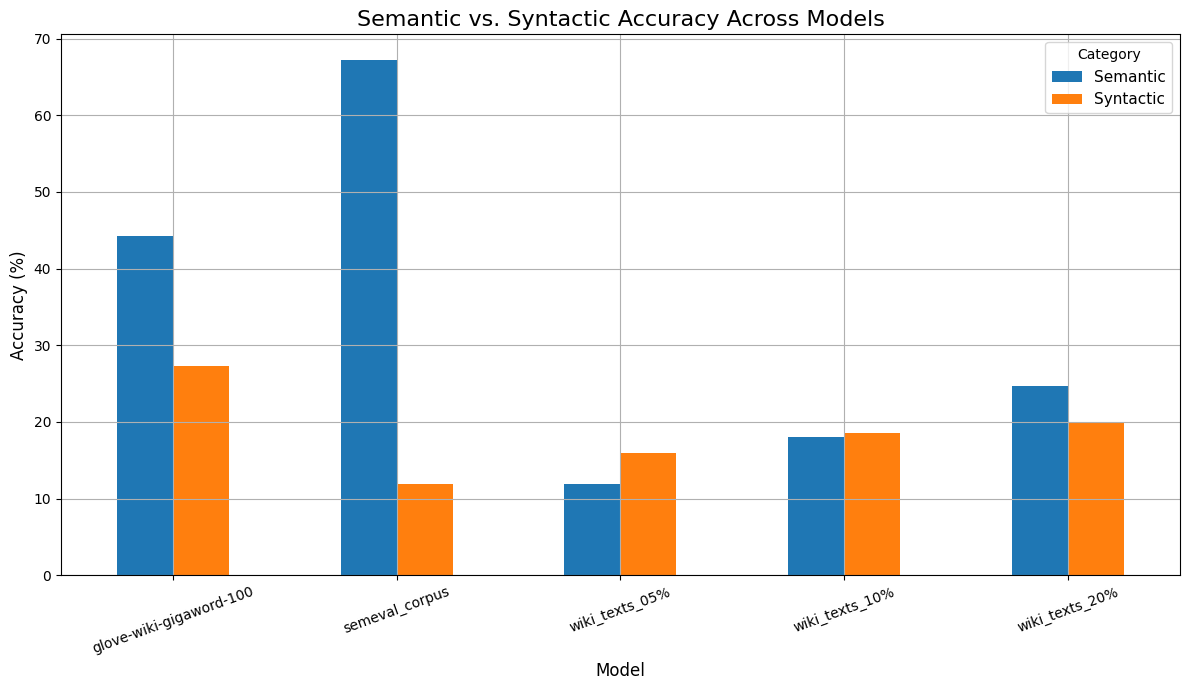

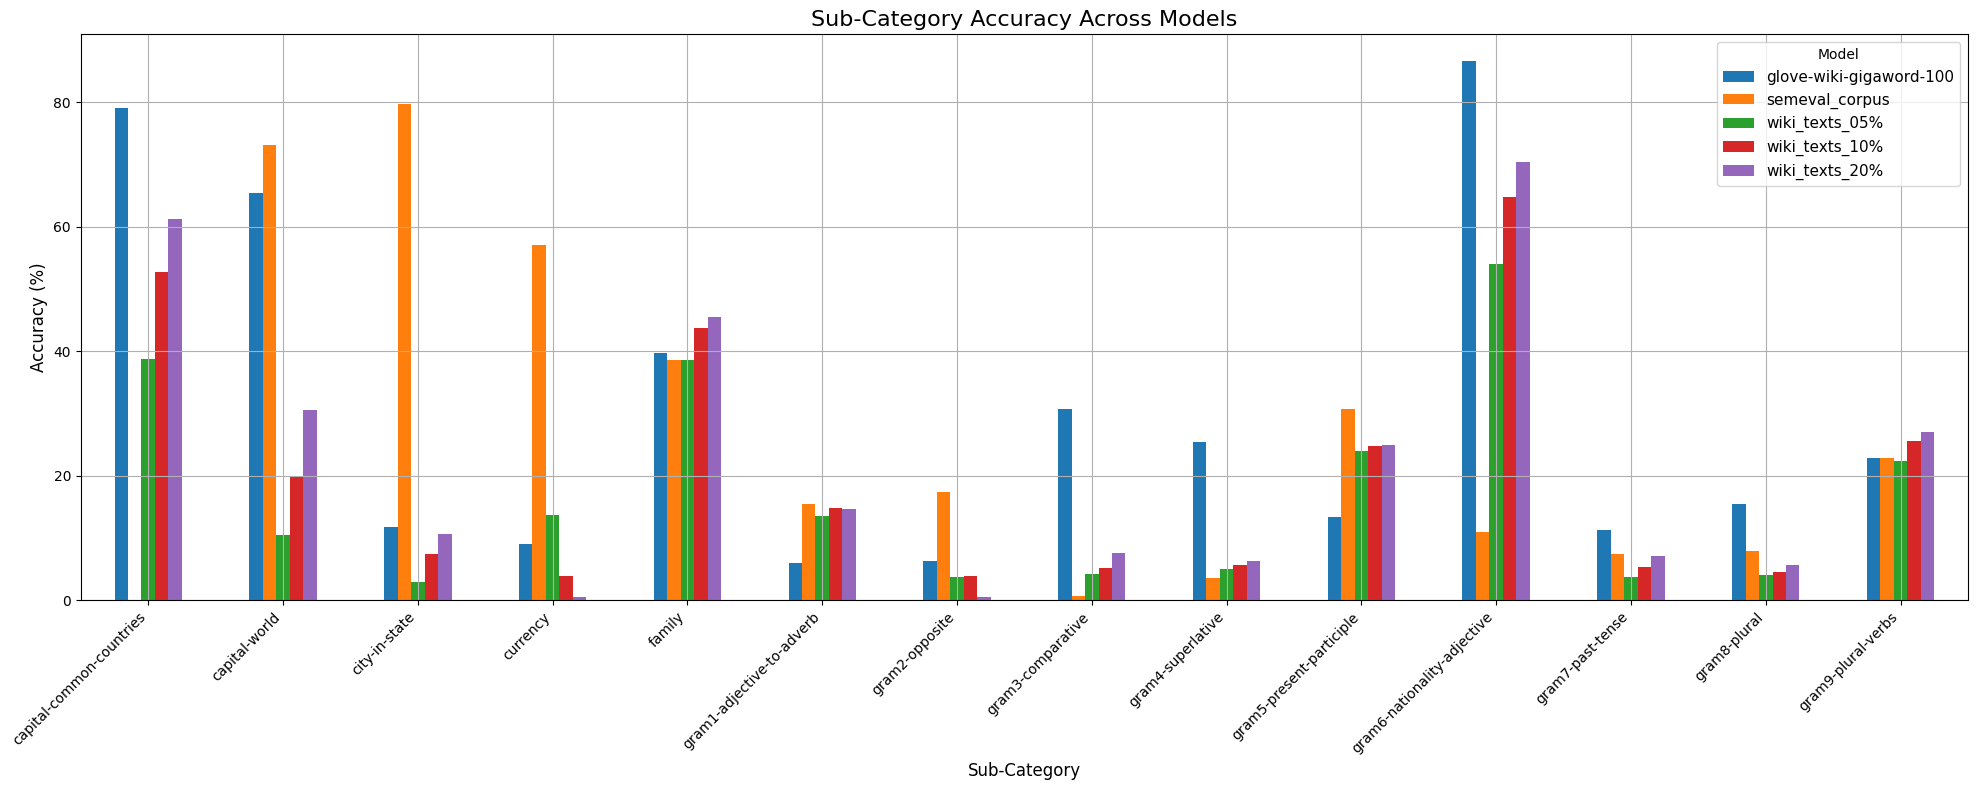

In [44]:
# Gemini also helped me make the plot with my data
import pandas as pd
import matplotlib.pyplot as plt

# Select only the two main category columns
df_categories = df_wide[['Semantic', 'Syntactic']]

# Create the bar plot
ax1 = df_categories.plot(
    kind='bar',
    figsize=(12, 7),
    rot=20, 
    grid=True
)

# Set plot titles and labels
ax1.set_title('Semantic vs. Syntactic Accuracy Across Models', fontsize=16)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.legend(title='Category', fontsize=11)
plt.tight_layout()
plt.show()


# Sub-Category Comparison

# Select all columns *except* for the two main categories
df_subcategories = df_wide.drop(columns=['Semantic', 'Syntactic'])

ax2 = df_subcategories.T.plot(
    kind='bar',
    figsize=(20, 8), 
    grid=True
)

# Set plot titles and labels
ax2.set_title('Sub-Category Accuracy Across Models', fontsize=16)
ax2.set_xlabel('Sub-Category', fontsize=12)
ax2.set_ylabel('Accuracy (%)', fontsize=12)
ax2.legend(title='Model', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

In [61]:
# Gemini also helped me with the regex format here
import re
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Parse the Data (from the previous step) ---

list_of_text_data = [
    """
    Model: glove-wiki-gigaword-100
    Category: Semantic, Count of Nones: 0
    Category: Syntactic, Count of Nones: 0
    Sub-Category: capital-common-countries, Count of Nones: 0
    Sub-Category: capital-world, Count of Nones: 0
    Sub-Category: currency, Count of Nones: 0
    Sub-Category: city-in-state, Count of Nones: 0
    Sub-Category: family, Count of Nones: 0
    Sub-Category: gram1-adjective-to-adverb, Count of Nones: 0
    Sub-Category: gram2-opposite, Count of Nones: 0
    Sub-Category: gram3-comparative, Count of Nones: 0
    Sub-Category: gram4-superlative, Count of Nones: 0
    Sub-Category: gram5-present-participle, Count of Nones: 0
    Sub-Category: gram6-nationality-adjective, Count of Nones: 0
    Sub-Category: gram7-past-tense, Count of Nones: 0
    Sub-Category: gram8-plural, Count of Nones: 0
    Sub-Category: gram9-plural-verbs, Count of Nones: 0
    """,
    """
    Model: semeval_corpus
    Category: Semantic, Count of Nones: 5946
    Category: Syntactic, Count of Nones: 1010
    Sub-Category: capital-common-countries, Count of Nones: 0
    Sub-Category: capital-world, Count of Nones: 3305
    Sub-Category: currency, Count of Nones: 493
    Sub-Category: city-in-state, Count of Nones: 1966
    Sub-Category: family, Count of Nones: 182
    Sub-Category: gram1-adjective-to-adverb, Count of Nones: 151
    Sub-Category: gram2-opposite, Count of Nones: 140
    Sub-Category: gram3-comparative, Count of Nones: 0
    Sub-Category: gram4-superlative, Count of Nones: 33
    Sub-Category: gram5-present-participle, Count of Nones: 300
    Sub-Category: gram6-nationality-adjective, Count of Nones: 117
    Sub-Category: gram7-past-tense, Count of Nones: 39
    Sub-Category: gram8-plural, Count of Nones: 36
    Sub-Category: gram9-plural-verbs, Count of Nones: 194
    """,
    """
    Model: wiki_texts_20%
    Category: Semantic, Count of Nones: 86
    Category: Syntactic, Count of Nones: 567
    Sub-Category: capital-common-countries, Count of Nones: 0
    Sub-Category: capital-world, Count of Nones: 0
    Sub-Category: currency, Count of Nones: 0
    Sub-Category: city-in-state, Count of Nones: 0
    Sub-Category: family, Count of Nones: 86
    Sub-Category: gram1-adjective-to-adverb, Count of Nones: 122
    Sub-Category: gram2-opposite, Count of Nones: 0
    Sub-Category: gram3-comparative, Count of Nones: 0
    Sub-Category: gram4-superlative, Count of Nones: 33
    Sub-Category: gram5-present-participle, Count of Nones: 244
    Sub-Category: gram6-nationality-adjective, Count of Nones: 0
    Sub-Category: gram7-past-tense, Count of Nones: 0
    Sub-Category: gram8-plural, Count of Nones: 0
    Sub-Category: gram9-plural-verbs, Count of Nones: 168
    """,
    """
    Model: wiki_texts_10%
    Category: Semantic, Count of Nones: 115
    Category: Syntactic, Count of Nones: 595
    Sub-Category: capital-common-countries, Count of Nones: 0
    Sub-Category: capital-world, Count of Nones: 0
    Sub-Category: currency, Count of Nones: 29
    Sub-Category: city-in-state, Count of Nones: 0
    Sub-Category: family, Count of Nones: 86
    Sub-Category: gram1-adjective-to-adverb, Count of Nones: 122
    Sub-Category: gram2-opposite, Count of Nones: 28
    Sub-Category: gram3-comparative, Count of Nones: 0
    Sub-Category: gram4-superlative, Count of Nones: 33
    Sub-Category: gram5-present-participle, Count of Nones: 244
    Sub-Category: gram6-nationality-adjective, Count of Nones: 0
    Sub-Category: gram7-past-tense, Count of Nones: 0
    Sub-Category: gram8-plural, Count of Nones: 0
    Sub-Category: gram9-plural-verbs, Count of Nones: 168
    """,
    """
    Model: wiki_texts_05%
    Category: Semantic, Count of Nones: 202
    Category: Syntactic, Count of Nones: 595
    Sub-Category: capital-common-countries, Count of Nones: 0
    Sub-Category: capital-world, Count of Nones: 0
    Sub-Category: currency, Count of Nones: 116
    Sub-Category: city-in-state, Count of Nones: 0
    Sub-Category: family, Count of Nones: 86
    Sub-Category: gram1-adjective-to-adverb, Count of Nones: 122
    Sub-Category: gram2-opposite, Count of Nones: 28
    Sub-Category: gram3-comparative, Count of Nones: 0
    Sub-Category: gram4-superlative, Count of Nones: 33
    Sub-Category: gram5-present-participle, Count of Nones: 244
    Sub-Category: gram6-nationality-adjective, Count of Nones: 0
    Sub-Category: gram7-past-tense, Count of Nones: 0
    Sub-Category: gram8-plural, Count of Nones: 0
    Sub-Category: gram9-plural-verbs, Count of Nones: 168
    """,
]

model_pattern = re.compile(r"Model: (.+)")
nones_pattern = re.compile(r"(?:Category|Sub-Category): (.+), Count of Nones: (\d+)")

all_parsed_data = []
for text_block in list_of_text_data:
    current_model = None
    for line in text_block.strip().split('\n'):
        line = line.strip()
        if not line: continue
        model_match = model_pattern.match(line)
        if model_match:
            current_model = model_match.group(1).strip()
            continue
        if current_model:
            nones_match = nones_pattern.match(line)
            if nones_match:
                metric_name = nones_match.group(1).strip()
                nones_value = int(nones_match.group(2))
                all_parsed_data.append({"Model": current_model, "Metric": metric_name, "None_Count": nones_value})

df_long = pd.DataFrame(all_parsed_data)
df_wide_nones = df_long.pivot(index="Model", columns="Metric", values="None_Count")
df_wide_nones.columns.name = None

df_wide_nones

,Semantic,Syntactic,capital-common-countries,capital-world,city-in-state,currency,family,gram1-adjective-to-adverb,gram2-opposite,gram3-comparative,gram4-superlative,gram5-present-participle,gram6-nationality-adjective,gram7-past-tense,gram8-plural,gram9-plural-verbs
Model,,,,,,,,,,,,,,,,
glove-wiki-gigaword-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
semeval_corpus,5946,1010,0,3305,1966,493,182,151,140,0,33,300,117,39,36,194
wiki_texts_05%,202,595,0,0,0,116,86,122,28,0,33,244,0,0,0,168
wiki_texts_10%,115,595,0,0,0,29,86,122,28,0,33,244,0,0,0,168
wiki_texts_20%,86,567,0,0,0,0,86,122,0,0,33,244,0,0,0,168


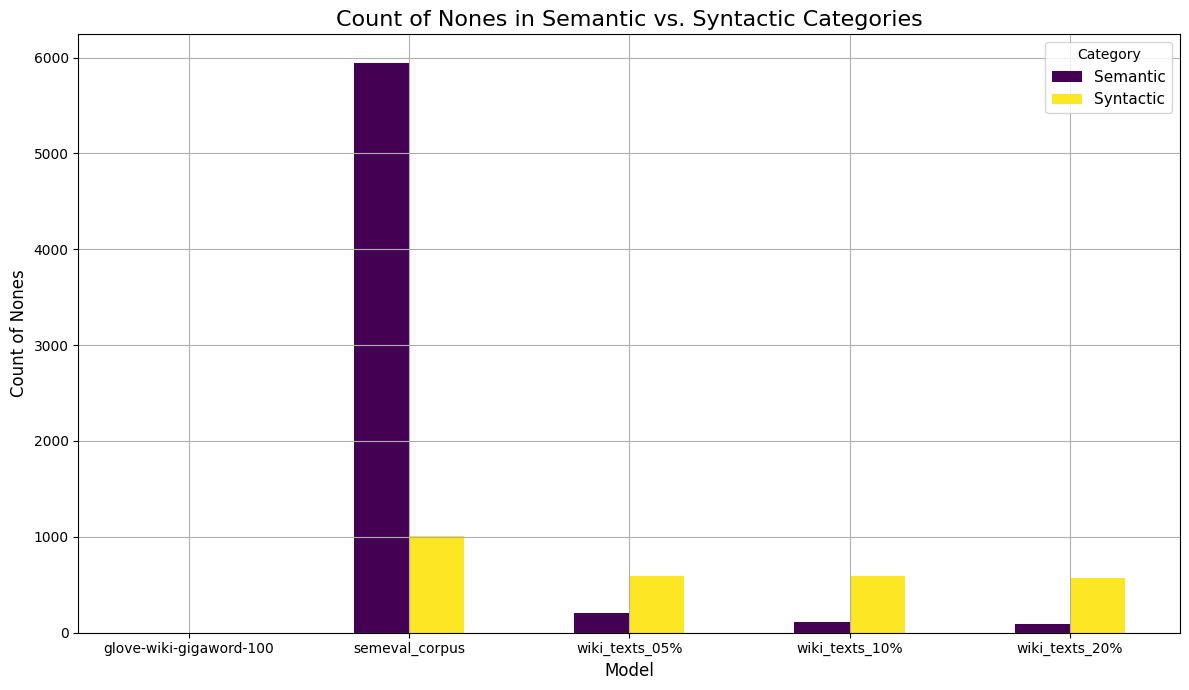

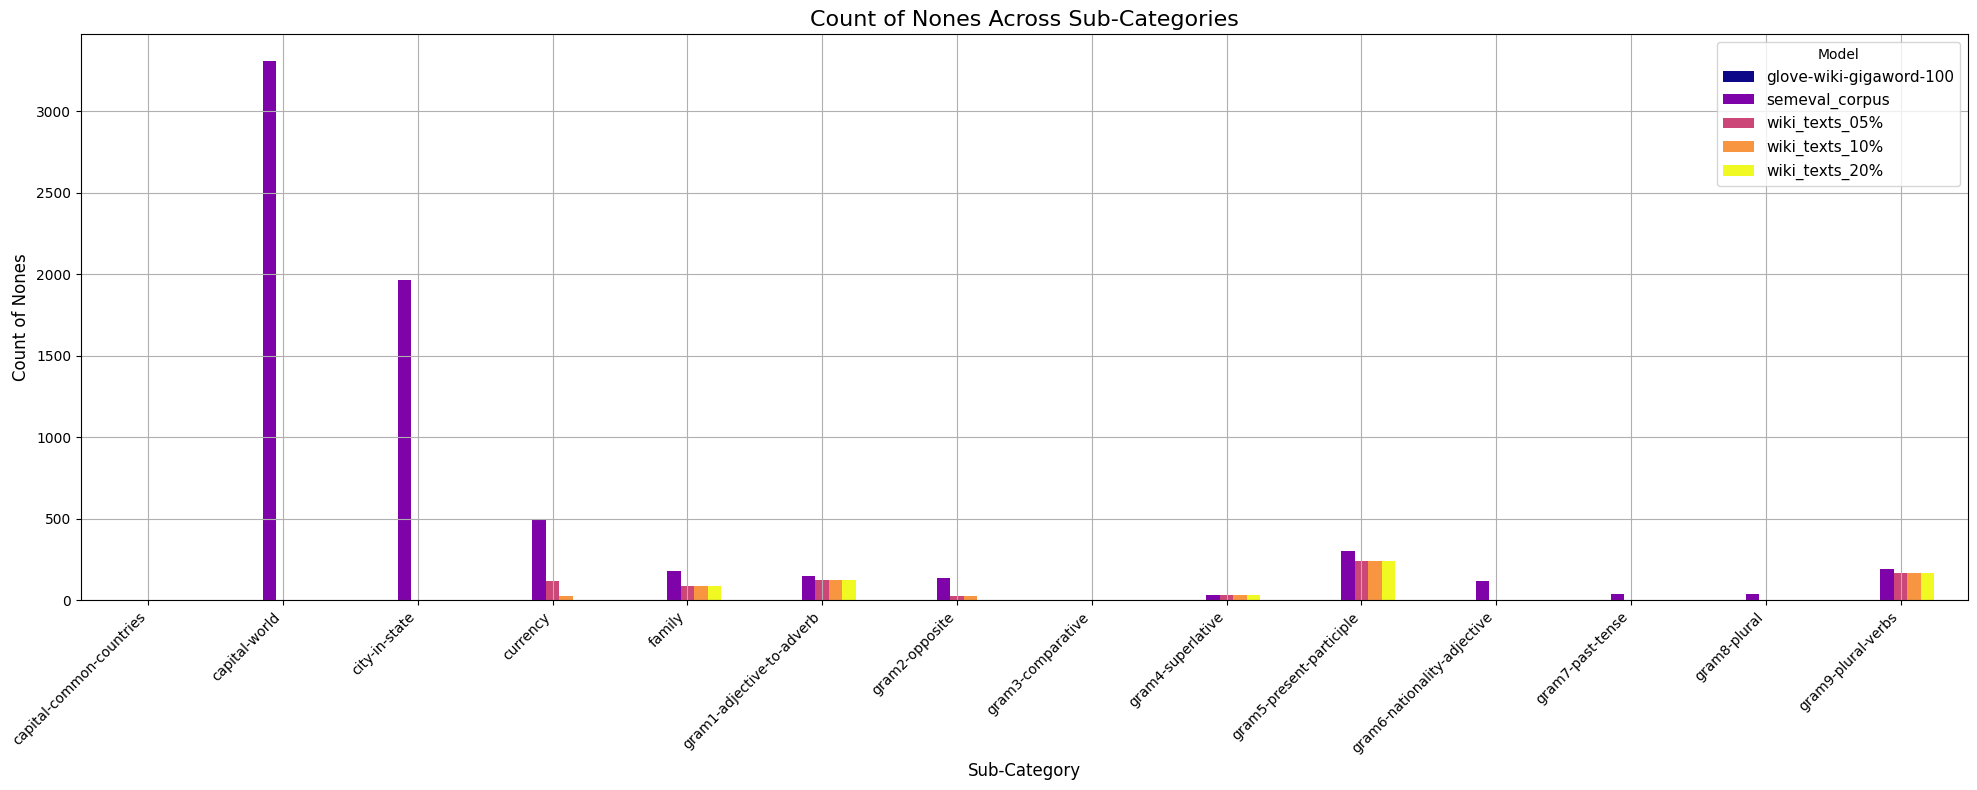

In [62]:
# Gemini also helped me in these plots
# Semantic vs. Syntactic Categories
df_categories = df_wide_nones[['Semantic', 'Syntactic']]

ax1 = df_categories.plot(
    kind='bar',
    figsize=(12, 7),
    rot=0,  
    grid=True,
    colormap='viridis'
)

ax1.set_title('Count of Nones in Semantic vs. Syntactic Categories', fontsize=16)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Count of Nones', fontsize=12)
ax1.legend(title='Category', fontsize=11)
plt.tight_layout()
plt.show()

# Sub-Category Comparison
df_subcategories = df_wide_nones.drop(columns=['Semantic', 'Syntactic'])

ax2 = df_subcategories.T.plot(
    kind='bar',
    figsize=(20, 8),
    grid=True,
    colormap='plasma'
)

ax2.set_title('Count of Nones Across Sub-Categories', fontsize=16)
ax2.set_xlabel('Sub-Category', fontsize=12)
ax2.set_ylabel('Count of Nones', fontsize=12)
ax2.legend(title='Model', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()